Model centroid: [ 0.10514985  0.12132563 -0.34515277]
Blender centroid: [-0.14617252  0.6710706   0.05519788]
Difference between centroids: [ 0.2513224  -0.54974496 -0.40035063]
Euclidean distance between centroids: 0.7250263


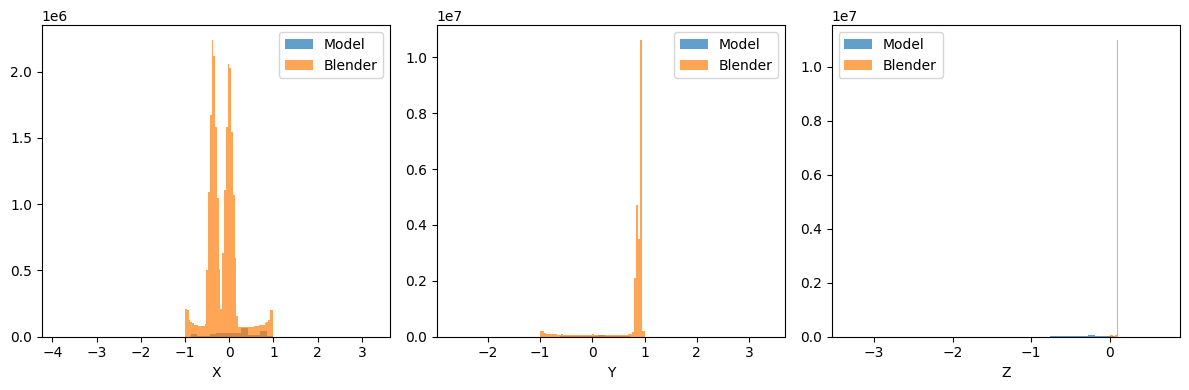

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Paths to the means files
model_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_first.npy"
blender_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy"

# Load the means from file
model_means = np.load(model_means_path)  # Shape: (N_model, 3)
blender_means = np.load(blender_means_path)  # Shape: (N_blender, 3)

# Compute the overall centroids (mean across all points)
model_centroid = model_means.mean(axis=0)
blender_centroid = blender_means.mean(axis=0)

print("Model centroid:", model_centroid)
print("Blender centroid:", blender_centroid)
centroid_diff = model_centroid - blender_centroid
print("Difference between centroids:", centroid_diff)
print("Euclidean distance between centroids:", np.linalg.norm(centroid_diff))

# Plot histograms of X, Y, Z coordinates for both sets
plt.figure(figsize=(12, 4))
axes = ['X', 'Y', 'Z']
for i, axis in enumerate(axes):
    plt.subplot(1, 3, i+1)
    plt.hist(model_means[:, i], bins=50, alpha=0.7, label="Model")
    plt.hist(blender_means[:, i], bins=50, alpha=0.7, label="Blender")
    plt.xlabel(axis)
    plt.legend()
plt.tight_layout()
plt.show()


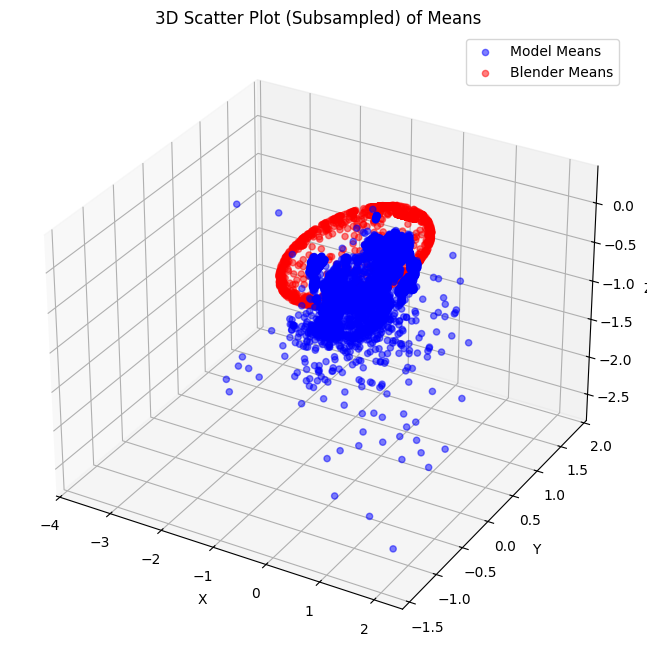

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
model_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_first.npy"
blender_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy"
model_means = np.load(model_means_path)  # (N_model, 3)
blender_means = np.load(blender_means_path)  # (N_blender, 3)

# Subsample for visualization (adjust sample size as needed)
sample_size = 5000
model_sample = model_means[np.random.choice(model_means.shape[0], sample_size, replace=False)]
blender_sample = blender_means[np.random.choice(blender_means.shape[0], sample_size, replace=False)]

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model_sample[:, 0], model_sample[:, 1], model_sample[:, 2],
           c='blue', alpha=0.5, label='Model Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='red', alpha=0.5, label='Blender Means')
ax.set_title("3D Scatter Plot (Subsampled) of Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Model centroid: [ 0.10514985  0.12132563 -0.34515277]
Blender centroid: [-0.14617252  0.6710706   0.05519788]
Model covariance matrix:
 [[0.22427223 0.02593204 0.02216399]
 [0.02593204 0.1182581  0.02693368]
 [0.02216399 0.02693368 0.08658881]]
Blender covariance matrix:
 [[ 0.11317737 -0.01777703 -0.00734507]
 [-0.01777703  0.19983966 -0.00149994]
 [-0.00734507 -0.00149994  0.00231477]]


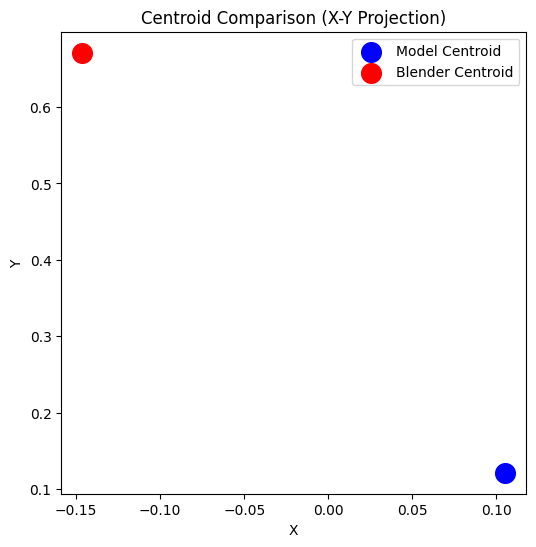

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
model_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_first.npy"
blender_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy"
model_means = np.load(model_means_path)  # (N_model, 3)
blender_means = np.load(blender_means_path)  # (N_blender, 3)

# Compute overall centroids
model_centroid = model_means.mean(axis=0)
blender_centroid = blender_means.mean(axis=0)

print("Model centroid:", model_centroid)
print("Blender centroid:", blender_centroid)

# You can also compute covariance to see the spread
model_cov = np.cov(model_means, rowvar=False)
blender_cov = np.cov(blender_means, rowvar=False)
print("Model covariance matrix:\n", model_cov)
print("Blender covariance matrix:\n", blender_cov)

# Plot the centroids
plt.figure(figsize=(6, 6))
plt.scatter(model_centroid[0], model_centroid[1], c='blue', s=200, label='Model Centroid')
plt.scatter(blender_centroid[0], blender_centroid[1], c='red', s=200, label='Blender Centroid')
plt.title("Centroid Comparison (X-Y Projection)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Load the means (assumed shape: (N, 3))
model_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_first.npy")
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")

# Compute centroids
model_centroid = model_means.mean(axis=0)
blender_centroid = blender_means.mean(axis=0)

print("Model centroid:", model_centroid)
print("Blender centroid:", blender_centroid)

# Center the points
model_centered = model_means - model_centroid
blender_centered = blender_means - blender_centroid

# Compute RMS distances (spread)
model_rms = np.sqrt(np.mean(np.sum(model_centered**2, axis=1)))
blender_rms = np.sqrt(np.mean(np.sum(blender_centered**2, axis=1)))

scale_factor = model_rms / blender_rms
print("Scale factor:", scale_factor)

# Transform the Blender means
blender_transformed = model_centroid + scale_factor * blender_centered

# Compute the new centroid for verification
new_blender_centroid = blender_transformed.mean(axis=0)
print("New Blender centroid (after transformation):", new_blender_centroid)

# Optionally, visualize the results:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model_means[:,0], model_means[:,1], model_means[:,2], 
           c='blue', alpha=0.5, label='Model Means')
ax.scatter(blender_transformed[:,0], blender_transformed[:,1], blender_transformed[:,2], 
           c='red', alpha=0.5, label='Transformed Blender Means')
ax.set_title("Comparison of Model and Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Model centroid: [ 0.10514985  0.12132563 -0.34515277]
Blender centroid: [-0.14617252  0.6710706   0.05519788]
Model RMS: 0.65507084
Blender RMS: 0.5656466
Scale factor: 1.1580921
New Blender centroid (after transformation): [ 0.10410562  0.22655573 -0.33554432]
Centroid difference (model - transformed Blender): [ 0.00104423 -0.10523011 -0.00960845]


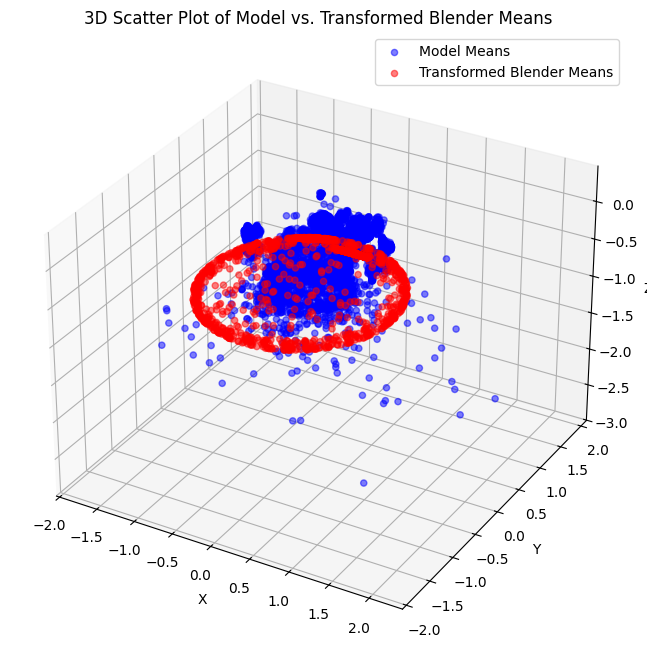

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# --- Load Data ---
model_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_first.npy"
blender_means_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy"
model_means = np.load(model_means_path)   # Expected shape: (N_model, 3)
blender_means = np.load(blender_means_path)  # Expected shape: (N_blender, 3)

# --- Compute Global Statistics ---
# Compute centroids for each set
model_centroid = model_means.mean(axis=0)
blender_centroid = blender_means.mean(axis=0)

print("Model centroid:", model_centroid)
print("Blender centroid:", blender_centroid)

# Center the points
model_centered = model_means - model_centroid
blender_centered = blender_means - blender_centroid

# Compute RMS (root-mean-square) distance from the centroid (spread)
model_rms = np.sqrt(np.mean(np.sum(model_centered**2, axis=1)))
blender_rms = np.sqrt(np.mean(np.sum(blender_centered**2, axis=1)))

scale_factor = model_rms / blender_rms
print("Model RMS:", model_rms)
print("Blender RMS:", blender_rms)
print("Scale factor:", scale_factor)

# --- Transform Blender Means ---
# Apply a linear transformation so that the Blender means have the same centroid and spread as the model means.
blender_transformed = model_centroid + scale_factor * blender_centered

# Verify that the new centroid of Blender data is now similar to the model centroid.
new_blender_centroid = blender_transformed.mean(axis=0)
print("New Blender centroid (after transformation):", new_blender_centroid)
print("Centroid difference (model - transformed Blender):", model_centroid - new_blender_centroid)

# --- Subsample for Visualization ---
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

subsample_size = 5000
model_sample = subsample_points(model_means, subsample_size)
blender_sample = subsample_points(blender_transformed, subsample_size)

# --- 3D Scatter Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model_sample[:, 0], model_sample[:, 1], model_sample[:, 2],
           c='blue', alpha=0.5, label='Model Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='red', alpha=0.5, label='Transformed Blender Means')
ax.set_title("3D Scatter Plot of Model vs. Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

axes = ['X', 'Y', 'Z']
plt.figure(figsize=(12, 4))
for i, axis in enumerate(axes):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(model_means[:, i], label="Model", shade=True, color="blue")
    sns.kdeplot(blender_means[:, i], label="Blender", shade=True, color="red")
    plt.xlabel(axis)
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
model_cov = np.cov(model_means, rowvar=False)
blender_cov = np.cov(blender_means, rowvar=False)

print("Model covariance matrix:\n", model_cov)
print("Blender covariance matrix:\n", blender_cov)


In [ ]:
from scipy.spatial.distance import pdist

# Sample a subset if the arrays are huge:
model_sample = model_means[np.random.choice(model_means.shape[0], size=1000, replace=False)]
blender_sample = blender_means[np.random.choice(blender_means.shape[0], size=1000, replace=False)]

model_pairwise = pdist(model_sample)
blender_pairwise = pdist(blender_sample)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(model_pairwise, bins=50, color='blue', alpha=0.7)
plt.title("Pairwise Distances (Model)")
plt.subplot(1, 2, 2)
plt.hist(blender_pairwise, bins=50, color='red', alpha=0.7)
plt.title("Pairwise Distances (Blender)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load color data (if saved in a combined npz file)
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_colors_first.npz")
model_colors = data['colors']  # shape (N, 3)

# Cluster into, say, 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(model_colors)

# Plot 3D scatter with clusters
model_means = np.load(model_means_path)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(model_means[:,0], model_means[:,1], model_means[:,2], c=labels, cmap='viridis', alpha=0.6)
ax.set_title("Model Means Colored by Cluster")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.colorbar(scatter)
plt.show()


In [10]:
!pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   ----------------------------- ---------- 8.1/11.1 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 24.9 MB/s eta 0:00:00


Cluster centers (color difference): [3.20921954 1.79332463]
Determined threshold: 2.501272084929001
Total Gaussians: 268808
Foreground Gaussians (by clustering): 113466


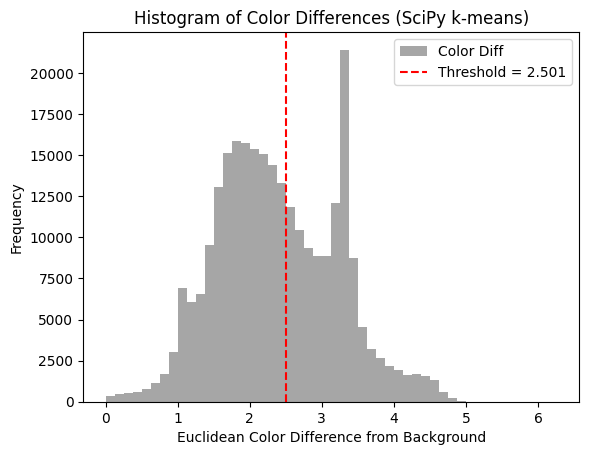

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

# --- Load GSplat Data (Means and Colors) ---
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']   # shape (N, 3)
model_colors = data['colors'] # shape (N, 3), assumed normalized in [0,1]

# Assume background is white
background_color = np.array([1.0, 1.0, 1.0])
# Compute Euclidean distances from background
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)

# --- Use SciPy's k-means to determine two clusters ---
# kmeans expects a 2D array; our color_diff is 2D with shape (N,1)
centers, distortion = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)

# Choose threshold as the midpoint between the two cluster centers.
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)

# Identify foreground points as those with a color difference greater than threshold.
foreground_mask = color_diff.flatten() > threshold

foreground_means = model_means[foreground_mask]
foreground_colors = model_colors[foreground_mask]

print("Total Gaussians:", model_means.shape[0])
print("Foreground Gaussians (by clustering):", foreground_means.shape[0])

# --- Visualize the histogram with the threshold ---
plt.hist(color_diff.flatten(), bins=50, color='gray', alpha=0.7, label='Color Diff')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.3f}')
plt.xlabel("Euclidean Color Difference from Background")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Color Differences (SciPy k-means)")
plt.show()


Total Gaussians: 268808
Foreground Gaussians: 113466
Background Gaussians: 155342
Foreground centroid: [ 0.03055978  0.10414684 -0.4841005 ]
Background centroid: [-0.00134609  0.0933376  -0.34596023]


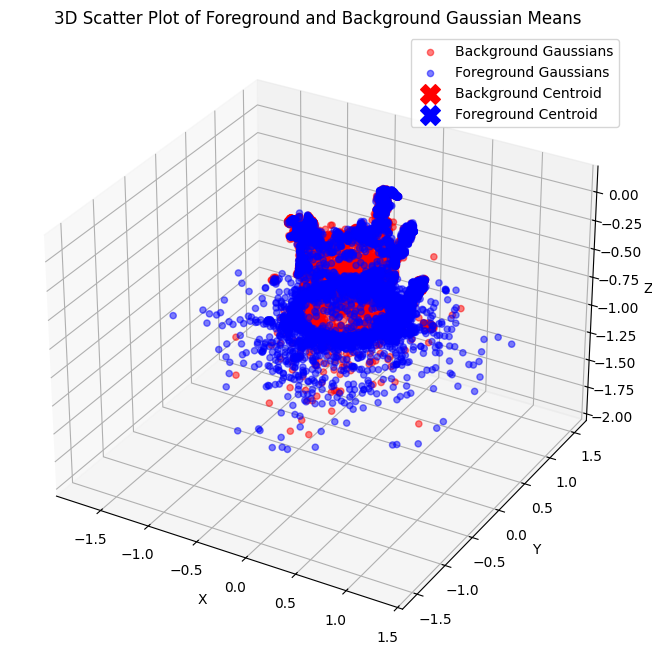

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# --- Load GSplat Data (Means and Colors) ---
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']   # shape (N, 3)
model_colors = data['colors'] # shape (N, 3), assumed normalized in [0,1]

# --- Compute Color Differences ---
# We assume the background is white.
background_color = np.array([1.0, 1.0, 1.0])
# Compute Euclidean distance from each Gaussian's color to white.
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)

# --- Use a Pre-determined Threshold (from previous k-means analysis) ---
threshold = 2.501272084929001

# --- Split into Foreground and Background ---
foreground_mask = color_diff.flatten() > threshold
background_mask = ~foreground_mask

foreground_means = model_means[foreground_mask]
background_means = model_means[background_mask]

print("Total Gaussians:", model_means.shape[0])
print("Foreground Gaussians:", foreground_means.shape[0])
print("Background Gaussians:", background_means.shape[0])

# --- Compute Centroids ---
foreground_centroid = foreground_means.mean(axis=0)
background_centroid = background_means.mean(axis=0)

print("Foreground centroid:", foreground_centroid)
print("Background centroid:", background_centroid)

# --- Subsample Points for Visualization ---
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

model_sample = subsample_points(model_means)
foreground_sample = subsample_points(foreground_means)
background_sample = subsample_points(background_means)

# --- 3D Scatter Plot ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot background points in red and foreground in blue.
ax.scatter(background_sample[:, 0], background_sample[:, 1], background_sample[:, 2],
           c='red', alpha=0.5, label='Background Gaussians')
ax.scatter(foreground_sample[:, 0], foreground_sample[:, 1], foreground_sample[:, 2],
           c='blue', alpha=0.5, label='Foreground Gaussians')

# Plot centroids as large markers (X shape)
ax.scatter(background_centroid[0], background_centroid[1], background_centroid[2],
           c='red', marker='X', s=200, label='Background Centroid')
ax.scatter(foreground_centroid[0], foreground_centroid[1], foreground_centroid[2],
           c='blue', marker='X', s=200, label='Foreground Centroid')

ax.set_title("3D Scatter Plot of Foreground and Background Gaussian Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [15]:
import numpy as np

# Assuming foreground_means and background_means are available from previous filtering.
foreground_cov = np.cov(foreground_means, rowvar=False)
background_cov = np.cov(background_means, rowvar=False)

print("Foreground covariance matrix:\n", foreground_cov)
print("Background covariance matrix:\n", background_cov)

# Optionally, compute eigenvalues and eigenvectors:
foreground_eigvals, foreground_eigvecs = np.linalg.eigh(foreground_cov)
background_eigvals, background_eigvecs = np.linalg.eigh(background_cov)

print("Foreground eigenvalues:", foreground_eigvals)
print("Background eigenvalues:", background_eigvals)


Foreground covariance matrix:
 [[ 0.18726029 -0.01960558  0.00333675]
 [-0.01960558  0.14398909  0.03823438]
 [ 0.00333675  0.03823438  0.09915283]]
Background covariance matrix:
 [[ 0.19735852 -0.05097222 -0.00265195]
 [-0.05097222  0.09799133  0.02017226]
 [-0.00265195  0.02017226  0.04755591]]
Foreground eigenvalues: [0.0757811  0.158278   0.19634312]
Background eigenvalues: [0.03879325 0.08463457 0.21947793]


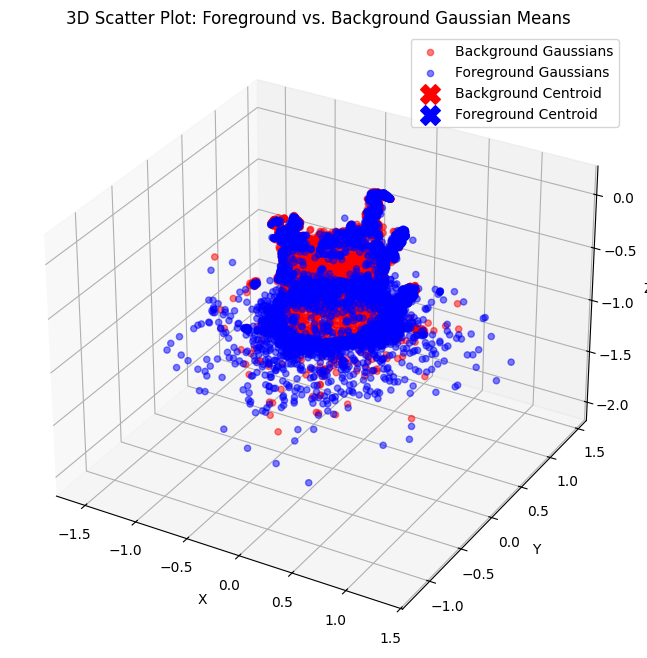

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting

# Subsample points for clarity if necessary
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

fg_sample = subsample_points(foreground_means)
bg_sample = subsample_points(background_means)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bg_sample[:, 0], bg_sample[:, 1], bg_sample[:, 2],
           c='red', alpha=0.5, label='Background Gaussians')
ax.scatter(fg_sample[:, 0], fg_sample[:, 1], fg_sample[:, 2],
           c='blue', alpha=0.5, label='Foreground Gaussians')

# Plot centroids
ax.scatter(background_centroid[0], background_centroid[1], background_centroid[2],
           c='red', marker='X', s=200, label='Background Centroid')
ax.scatter(foreground_centroid[0], foreground_centroid[1], foreground_centroid[2],
           c='blue', marker='X', s=200, label='Foreground Centroid')

ax.set_title("3D Scatter Plot: Foreground vs. Background Gaussian Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster-based foreground count: 111088
Cluster-based background count: 157720


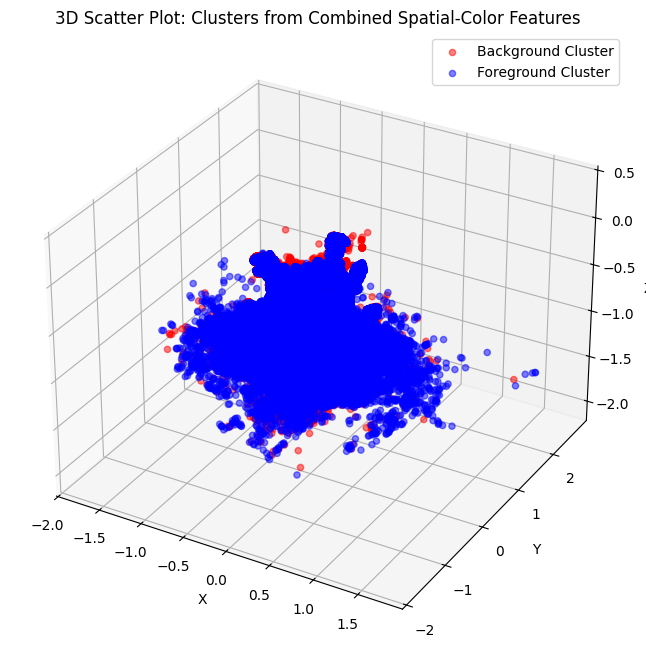

In [17]:
from scipy.cluster.vq import kmeans, vq

# Compute color differences from white for each Gaussian
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)

# Combine spatial and color information into one feature vector.
# We can weight the color difference if needed. Here we simply concatenate.
combined_features = np.hstack([model_means, color_diff])

# Run k-means with 2 clusters on the combined features.
centers, _ = kmeans(combined_features.astype(np.float32), 2)
labels, _ = vq(combined_features.astype(np.float32), centers)

# Determine which cluster corresponds to foreground by checking the average color_diff in each cluster.
cluster0_avg = np.mean(color_diff[labels == 0])
cluster1_avg = np.mean(color_diff[labels == 1])
if cluster0_avg > cluster1_avg:
    fg_labels = labels == 0
    bg_labels = labels == 1
else:
    fg_labels = labels == 1
    bg_labels = labels == 0

fg_cluster_means = model_means[fg_labels]
bg_cluster_means = model_means[bg_labels]

print("Cluster-based foreground count:", fg_cluster_means.shape[0])
print("Cluster-based background count:", bg_cluster_means.shape[0])

# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bg_cluster_means[:, 0], bg_cluster_means[:, 1], bg_cluster_means[:, 2],
           c='red', alpha=0.5, label='Background Cluster')
ax.scatter(fg_cluster_means[:, 0], fg_cluster_means[:, 1], fg_cluster_means[:, 2],
           c='blue', alpha=0.5, label='Foreground Cluster')
ax.set_title("3D Scatter Plot: Clusters from Combined Spatial-Color Features")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [18]:
def bhattacharyya_distance(mu1, cov1, mu2, cov2):
    cov_mean = (cov1 + cov2) / 2
    diff = mu1 - mu2
    term1 = 1/8 * diff.T @ np.linalg.inv(cov_mean) @ diff
    term2 = 0.5 * np.log(np.linalg.det(cov_mean) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    return term1 + term2

bd = bhattacharyya_distance(foreground_centroid, foreground_cov, background_centroid, background_cov)
print("Bhattacharyya distance between foreground and background:", bd)


Bhattacharyya distance between foreground and background: 0.0932749983046347


Cluster centers (color difference): [1.79331552 3.20920706]
Determined threshold: 2.501261288406667
Total Gaussians: 268808
Foreground Gaussians: 113466
Background Gaussians: 155342
Foreground centroid: [ 0.03055978  0.10414684 -0.4841005 ]
Background centroid: [-0.00134609  0.0933376  -0.34596023]
Blender centroid: [-1.4853565  8.037843   6.323824 ]
Model foreground RMS: 0.6560476
Blender RMS: 6.690542
Scale factor: 0.098055966
New Blender centroid (after transformation): [ 0.03216282  0.0428947  -0.380862  ]
Centroid difference (foreground - transformed Blender): [-0.00160304  0.06125214 -0.10323849]


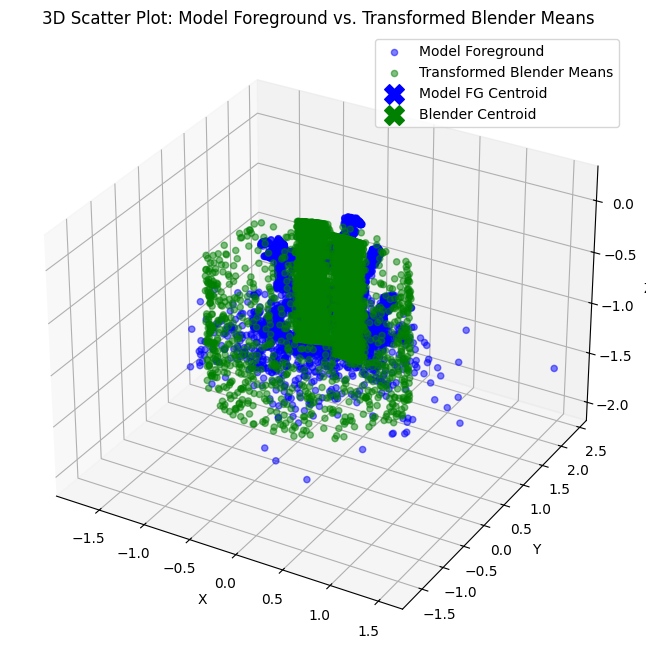

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # required for 3D plotting
from scipy.cluster.vq import kmeans

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
# Assume that the background is white.
background_color = np.array([1.0, 1.0, 1.0])
# Compute the Euclidean distance from each Gaussian's color to the background color.
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)

# Use SciPy's k-means to cluster these 1D differences into two clusters.
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)

# Set threshold as the midpoint between the two cluster centers.
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)

# By default, assume that Gaussians with a color difference greater than threshold are foreground.
# (If you believe the clusters are switched, set invert=True.)
invert = False  # Change to True if necessary.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

foreground_means = model_means[foreground_mask]
background_means = model_means[~foreground_mask]

print("Total Gaussians:", model_means.shape[0])
print("Foreground Gaussians:", foreground_means.shape[0])
print("Background Gaussians:", background_means.shape[0])

# Compute centroids for each group.
foreground_centroid = foreground_means.mean(axis=0)
background_centroid = background_means.mean(axis=0)
print("Foreground centroid:", foreground_centroid)
print("Background centroid:", background_centroid)

# -----------------------
# 3. Load Blender Means (assumed to be from the object surface only)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Blender centroid:", blender_centroid)

# -----------------------
# 4. Compute Scaling to Align the Foreground Distributions
# -----------------------
# Compute RMS (root-mean-square) distances (spread) for the model foreground:
fg_centered = foreground_means - foreground_centroid
model_fg_rms = np.sqrt(np.mean(np.sum(fg_centered**2, axis=1)))

# Compute RMS for the Blender means:
blender_centered = blender_means - blender_centroid
blender_rms = np.sqrt(np.mean(np.sum(blender_centered**2, axis=1)))

scale_factor = model_fg_rms / blender_rms
print("Model foreground RMS:", model_fg_rms)
print("Blender RMS:", blender_rms)
print("Scale factor:", scale_factor)

# Transform Blender means: first center, then scale, then translate to match the model foreground centroid.
blender_transformed = foreground_centroid + scale_factor * (blender_means - blender_centroid)
new_blender_centroid = blender_transformed.mean(axis=0)
print("New Blender centroid (after transformation):", new_blender_centroid)
print("Centroid difference (foreground - transformed Blender):", foreground_centroid - new_blender_centroid)

# -----------------------
# 5. Visualization
# -----------------------
# To speed up 3D plotting, subsample the points if needed.
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

fg_sample = subsample_points(foreground_means)
blender_sample = subsample_points(blender_transformed)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fg_sample[:, 0], fg_sample[:, 1], fg_sample[:, 2],
           c='blue', alpha=0.5, label='Model Foreground')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Transformed Blender Means')
ax.scatter(foreground_centroid[0], foreground_centroid[1], foreground_centroid[2],
           marker='X', s=200, c='blue', label='Model FG Centroid')
ax.scatter(new_blender_centroid[0], new_blender_centroid[1], new_blender_centroid[2],
           marker='X', s=200, c='green', label='Blender Centroid')
ax.set_title("3D Scatter Plot: Model Foreground vs. Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [1.7933105 3.2091506]
Determined threshold: 2.5012305
Total Gaussians: 268808
Foreground Gaussians: 113471
Background Gaussians: 155337


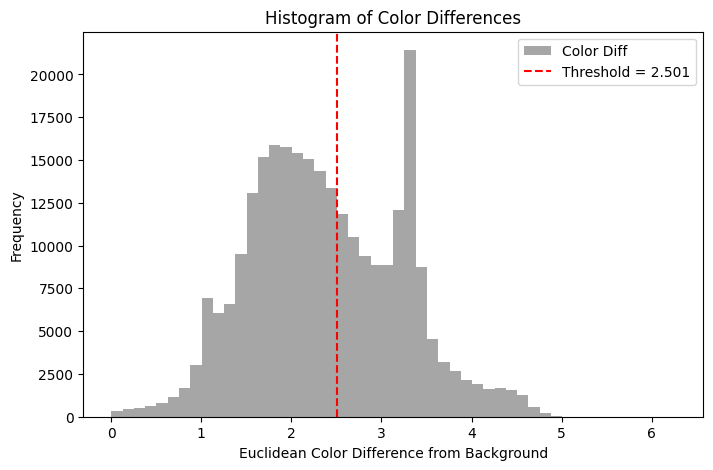

Foreground centroid: [ 0.03056278  0.1041494  -0.48408738]
Background centroid: [-0.0013493   0.09333537 -0.34596536]


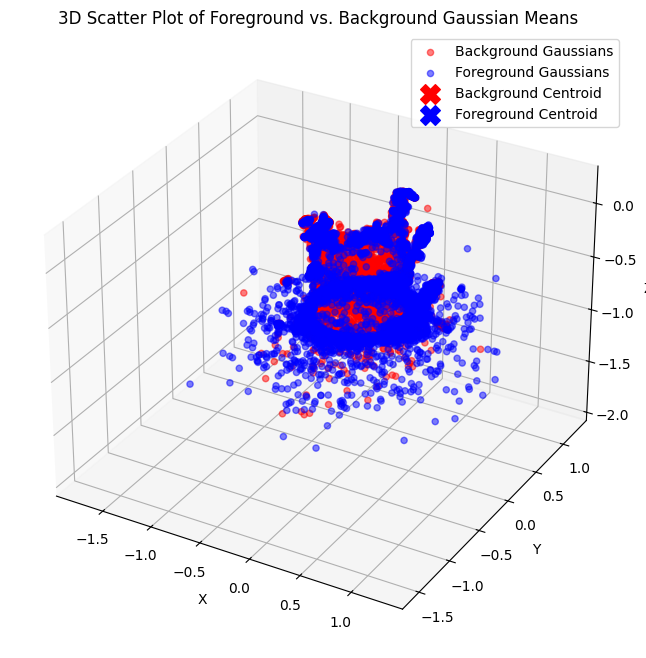

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq

# --- Load GSplat Data (Means and Colors) ---
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N, 3)
model_colors = data['colors']  # shape: (N, 3), assumed normalized in [0,1]

# --- Compute Color Differences ---
# Assume background is white
background_color = np.array([1.0, 1.0, 1.0])
# Compute Euclidean distance from each Gaussian's color to white
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)

# --- Cluster Using SciPy's k-means ---
# kmeans returns cluster centers and the distortion; we use 2 clusters.
centers, distortion = kmeans(color_diff.astype(np.float32), 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)

# Determine threshold as the midpoint between the two centers
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)

# --- Filter Gaussians into Foreground and Background ---
# Here we assume that Gaussians with color difference greater than threshold are foreground.
foreground_mask = color_diff.flatten() > threshold
foreground_means = model_means[foreground_mask]
background_means = model_means[~foreground_mask]

print("Total Gaussians:", model_means.shape[0])
print("Foreground Gaussians:", foreground_means.shape[0])
print("Background Gaussians:", background_means.shape[0])

# --- Visualization ---
# Plot a histogram of the color differences with the threshold.
plt.figure(figsize=(8, 5))
plt.hist(color_diff.flatten(), bins=50, color='gray', alpha=0.7, label='Color Diff')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.3f}')
plt.xlabel("Euclidean Color Difference from Background")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Color Differences")
plt.show()

# Additionally, plot the centroids (mean positions) of foreground and background.
foreground_centroid = foreground_means.mean(axis=0)
background_centroid = background_means.mean(axis=0)

print("Foreground centroid:", foreground_centroid)
print("Background centroid:", background_centroid)

# 3D Scatter Plot (subsampled for clarity)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

fg_sample = subsample_points(foreground_means)
bg_sample = subsample_points(background_means)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bg_sample[:, 0], bg_sample[:, 1], bg_sample[:, 2],
           c='red', alpha=0.5, label='Background Gaussians')
ax.scatter(fg_sample[:, 0], fg_sample[:, 1], fg_sample[:, 2],
           c='blue', alpha=0.5, label='Foreground Gaussians')
ax.scatter(background_centroid[0], background_centroid[1], background_centroid[2],
           marker='X', s=200, c='red', label='Background Centroid')
ax.scatter(foreground_centroid[0], foreground_centroid[1], foreground_centroid[2],
           marker='X', s=200, c='blue', label='Foreground Centroid')
ax.set_title("3D Scatter Plot of Foreground vs. Background Gaussian Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [23]:
import numpy as np
from scipy.spatial import KDTree

def compute_local_density(points, radius=0.1):
    """
    For each point, count the number of neighbors within a given radius.
    This serves as a proxy for local density.
    """
    tree = KDTree(points)
    densities = np.array([len(tree.query_ball_point(p, radius)) for p in points])
    return densities

# Assume you already have these arrays from your previous analysis:
# - foreground_means: GSplat foreground Gaussian positions, shape (N, 3)
# - blender_means: Blender-sampled points, shape (M, 3)
#
# (If you haven't already filtered Blender points to foreground, you may need to do that first.)

# Compute local densities using an appropriate radius (adjust based on your scene scale)
radius = 0.1
gs_densities = compute_local_density(foreground_means, radius=radius)
blender_densities = compute_local_density(blender_means, radius=radius)

# Compute density-weighted centroids
gs_weighted_centroid = np.average(foreground_means, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)

print("GS (density-weighted) centroid:", gs_weighted_centroid)
print("Blender (density-weighted) centroid:", blender_weighted_centroid)

# Optionally, you can also compute a density-weighted RMS (spread) for each set:
def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    # Compute weighted squared distances
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(foreground_means, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS:", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

# Now, compute a scale factor based on the density-weighted spreads
scale_factor = gs_weighted_rms / blender_weighted_rms
print("Scale factor (weighted):", scale_factor)

# Transform Blender points: first center using the Blender weighted centroid,
# then scale, then translate to the GS weighted centroid.
blender_transformed = gs_weighted_centroid + scale_factor * (blender_means - blender_weighted_centroid)

new_blender_weighted_centroid = np.average(blender_transformed, axis=0,
                                           weights=compute_local_density(blender_transformed, radius=radius))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS - transformed Blender):", gs_weighted_centroid - new_blender_weighted_centroid)


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

def compute_local_density_fast(points, radius=0.1):
    """
    Compute local density for each point by counting the number of neighbors within a given radius.
    Uses KDTree's batch query for speed.
    
    Parameters:
        points (np.ndarray): Array of shape (N, 3)
        radius (float): Search radius.
    
    Returns:
        densities (np.ndarray): Array of shape (N,) with neighbor counts.
    """
    tree = KDTree(points)
    # Query all neighbors for all points at once.
    all_neighbors = tree.query_ball_tree(tree, r=radius)
    densities = np.array([len(neighbors) for neighbors in all_neighbors])
    return densities

def compute_weighted_rms(points, centroid, weights):
    """
    Compute the density-weighted RMS (spread) of the points relative to a centroid.
    
    Parameters:
        points (np.ndarray): (N, 3)
        centroid (np.ndarray): (3,)
        weights (np.ndarray): (N,)
    
    Returns:
        rms (float)
    """
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

def subsample_points(points, sample_size=5000):
    """
    Randomly subsample points for faster visualization.
    
    Parameters:
        points (np.ndarray): (N, 3)
        sample_size (int): Desired number of points.
    
    Returns:
        Subsampled points (np.ndarray)
    """
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

# --- 1. Load Data ---
# GSplat data (model foreground means and colors)
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3) (normalized to [0, 1])
# (Assume these have been filtered already to be foreground)

# Blender data: dense surface samples (in world coordinates)
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")  # shape: (N_blender, 3)

# --- 2. Compute Density-Weighted Statistics for Both Datasets ---
radius = 0.1  # adjust based on scene scale
gs_densities = compute_local_density_fast(model_means, radius=radius)
blender_densities = compute_local_density_fast(blender_means, radius=radius)

# Compute density-weighted centroids
gs_weighted_centroid = np.average(model_means, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)

print("GS (density-weighted) centroid:", gs_weighted_centroid)
print("Blender (density-weighted) centroid:", blender_weighted_centroid)

# Compute density-weighted RMS (spread)
gs_weighted_rms = compute_weighted_rms(model_means, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)

print("GS weighted RMS:", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

# --- 3. Compute Global Transformation ---
# Global (isotropic) scale factor based on weighted RMS values.
scale_factor = gs_weighted_rms / blender_weighted_rms
print("Scale factor (weighted):", scale_factor)

# Transform Blender means: first center using Blender weighted centroid, then scale, then translate to match GS weighted centroid.
blender_transformed = gs_weighted_centroid + scale_factor * (blender_means - blender_weighted_centroid)

# Recompute density for transformed Blender points to verify the new weighted centroid.
new_blender_densities = compute_local_density_fast(blender_transformed, radius=radius)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0, weights=new_blender_densities)
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS - transformed Blender):", gs_weighted_centroid - new_blender_weighted_centroid)

# --- 4. Visualization ---
# Subsample points for visualization
gs_sample = subsample_points(model_means, sample_size=5000)
blender_sample = subsample_points(blender_transformed, sample_size=5000)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gs_sample[:, 0], gs_sample[:, 1], gs_sample[:, 2],
           c='blue', alpha=0.5, label='GS Model Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Transformed Blender Means')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
ax.scatter(new_blender_weighted_centroid[0], new_blender_weighted_centroid[1], new_blender_weighted_centroid[2],
           marker='X', s=200, c='green', label='Transformed Blender Centroid')
ax.set_title("3D Visualization: Density-Weighted Alignment")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [1.79333375 3.20923201]
Determined threshold: 2.501282881532115
Foreground centroid (GS): [ 0.03056606  0.10414503 -0.4841023 ]
Original Blender centroid: [-1.4853565  8.037843   6.323824 ]
Optimal rotation matrix R:
 [[-0.75006855  0.6149279  -0.24343531]
 [-0.02415575 -0.39330968 -0.9190887 ]
 [-0.6609187  -0.68349916  0.3098633 ]]
Optimal scale factor s: 0.0015285163
Optimal translation t: [ 0.02070258  0.12035975 -0.4853854 ]
New Blender centroid (after Procrustes): [ 0.02122107  0.08399402 -0.33554432]
Centroid difference (GS foreground - transformed Blender): [ 0.00934499  0.020151   -0.14855799]
Saved transformed Blender means and background means to C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz
Saved Blender Means count: 155343
Saved Background Means count: 155343


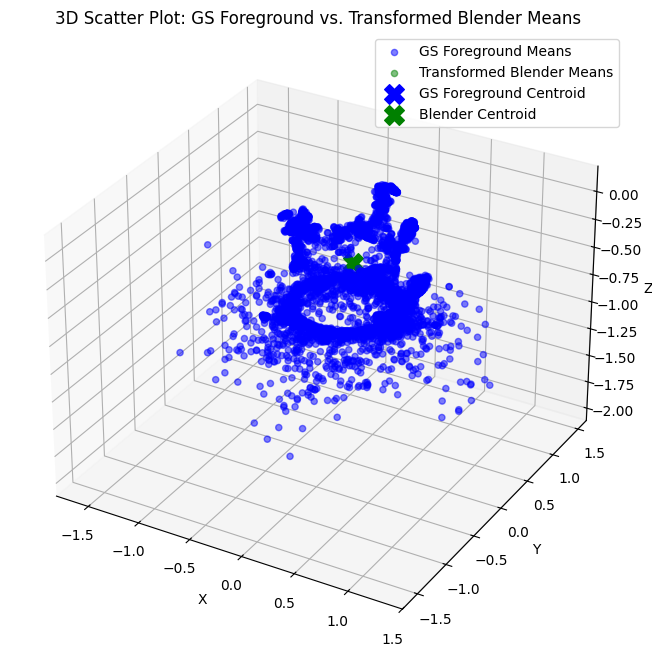

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)
invert = False
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold
background_mask = ~foreground_mask
background_means = model_means[background_mask]
print("Total Gaussians:", model_means.shape[0])
print("Background Gaussians:", background_means.shape[0])
foreground_centroid = model_means[foreground_mask].mean(axis=0)
background_centroid = background_means.mean(axis=0)
print("Foreground centroid:", foreground_centroid)
print("Background centroid:", background_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Transform Blender Means to Match GSplat Foreground Distribution
# -----------------------
fg_centered = model_means[foreground_mask] - foreground_centroid
model_fg_rms = np.sqrt(np.mean(np.sum(fg_centered**2, axis=1)))
blender_centered = blender_means - blender_centroid
blender_rms = np.sqrt(np.mean(np.sum(blender_centered**2, axis=1)))
scale_factor = model_fg_rms / blender_rms
print("Model foreground RMS:", model_fg_rms)
print("Blender RMS:", blender_rms)
print("Initial Global scale factor:", scale_factor)
scale_factor_adjusted = scale_factor 
print("Adjusted scale factor (divided by 100):", scale_factor_adjusted)
blender_transformed = foreground_centroid + scale_factor_adjusted * (blender_means - blender_centroid)
new_blender_centroid = blender_transformed.mean(axis=0)
print("New Blender centroid (after transformation):", new_blender_centroid)
print("Centroid difference (foreground - transformed Blender):", foreground_centroid - new_blender_centroid)

# -----------------------
# 5. Downsample Blender Means to Match Background Count and Save to File
# -----------------------
target_count = background_means.shape[0]
if blender_transformed.shape[0] > target_count:
    indices = np.random.choice(blender_transformed.shape[0], target_count, replace=False)
    blender_transformed_subsample = blender_transformed[indices]
else:
    blender_transformed_subsample = blender_transformed

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=blender_transformed_subsample, background_means=background_means)
print(f"Saved blender and background means to {save_path}")
print("Saved Blender Means count:", blender_transformed_subsample.shape[0])
print("Saved Background Means count:", background_means.shape[0])

# -----------------------
# 6. Visualization: Model Foreground vs. Transformed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

foreground_sample = subsample_points(model_means[foreground_mask])
blender_sample = subsample_points(blender_transformed_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(foreground_sample[:, 0], foreground_sample[:, 1], foreground_sample[:, 2],
           c='blue', alpha=0.5, label='GS Foreground Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Transformed Blender Means')
ax.scatter(foreground_centroid[0], foreground_centroid[1], foreground_centroid[2],
           marker='X', s=200, c='blue', label='GS Foreground Centroid')
ax.scatter(new_blender_centroid[0], new_blender_centroid[1], new_blender_centroid[2],
           marker='X', s=200, c='green', label='Blender Centroid')
ax.set_title("3D Scatter Plot: GS Foreground vs. Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)
invert = False  # Change to True if necessary.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold
background_mask = ~foreground_mask
background_means = model_means[background_mask]
print("Total GS Gaussians:", model_means.shape[0])
print("Background GS Gaussians:", background_means.shape[0])

# Compute centroids for visualization (simple mean)
foreground_centroid = model_means[foreground_mask].mean(axis=0)
background_centroid = background_means.mean(axis=0)
print("GS Foreground centroid:", foreground_centroid)
print("GS Background centroid:", background_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Compute Density-Weighted Statistics
# -----------------------
def compute_local_density_fast(points, radius=0.1):
    """Compute the number of neighbors within a given radius for each point using KDTree."""
    tree = KDTree(points)
    all_neighbors = tree.query_ball_tree(tree, r=radius)
    densities = np.array([len(neighbors) for neighbors in all_neighbors])
    return densities

radius = 0.1  # Adjust based on your scene scale.
gs_densities = compute_local_density_fast(model_means[foreground_mask], radius=radius)
blender_densities = compute_local_density_fast(blender_means, radius=radius)

# Compute density-weighted centroids
gs_weighted_centroid = np.average(model_means[foreground_mask], axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid:", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

# Compute density-weighted RMS (spread)
def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(model_means[foreground_mask], gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS:", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

# -----------------------
# 5. Density-Based Transformation
# -----------------------
# We compute a global scale factor based on weighted RMS.
density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Density-based scale factor:", density_scale_factor)

# Transform Blender points: center them using their weighted centroid, scale, then translate to the GS weighted centroid.
blender_transformed = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0, 
                                           weights=compute_local_density_fast(blender_transformed, radius=radius))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS weighted - transformed Blender weighted):", gs_weighted_centroid - new_blender_weighted_centroid)

# -----------------------
# 6. Downsample Blender Means to Match Background Count and Save to File
# -----------------------
target_count = background_means.shape[0]
if blender_transformed.shape[0] > target_count:
    indices = np.random.choice(blender_transformed.shape[0], target_count, replace=False)
    blender_transformed_subsample = blender_transformed[indices]
else:
    blender_transformed_subsample = blender_transformed

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=blender_transformed_subsample, background_means=background_means)
print(f"Saved blender and background means to {save_path}")
print("Saved Blender Means count:", blender_transformed_subsample.shape[0])
print("Saved Background Means count:", background_means.shape[0])

# -----------------------
# 7. Visualization: GS Foreground vs. Transformed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

foreground_sample = subsample_points(model_means[foreground_mask])
blender_sample = subsample_points(blender_transformed_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(foreground_sample[:, 0], foreground_sample[:, 1], foreground_sample[:, 2],
           c='blue', alpha=0.5, label='GS Foreground Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Transformed Blender Means (Density-based)')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
ax.scatter(new_blender_weighted_centroid[0], new_blender_weighted_centroid[1], new_blender_weighted_centroid[2],
           marker='X', s=200, c='green', label='Blender Weighted Centroid')
ax.set_title("3D Scatter Plot: GS Foreground vs. Density-Based Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [3.22537742 1.80511113]
Determined threshold: 2.5152442765213507
Total GS Gaussians: 268808
Background GS Gaussians: 156664
GS Foreground centroid: [ 0.03086217  0.10428471 -0.4864598 ]
GS Background centroid: [-0.00129332  0.0933302  -0.34543687]
Original Blender centroid: [-1.4853565  8.037843   6.323824 ]


In [10]:
print("GS Foreground X range:", np.min(model_means[foreground_mask][:,0]), np.max(model_means[foreground_mask][:,0]))
print("GS Foreground Y range:", np.min(model_means[foreground_mask][:,1]), np.max(model_means[foreground_mask][:,1]))
print("GS Foreground Z range:", np.min(model_means[foreground_mask][:,2]), np.max(model_means[foreground_mask][:,2]))

print("Transformed Blender X range:", np.min(blender_transformed[:,0]), np.max(blender_transformed[:,0]))
print("Transformed Blender Y range:", np.min(blender_transformed[:,1]), np.max(blender_transformed[:,1]))
print("Transformed Blender Z range:", np.min(blender_transformed[:,2]), np.max(blender_transformed[:,2]))


GS Foreground X range: -1.7645797 1.7399843
GS Foreground Y range: -1.7764804 2.425458
GS Foreground Z range: -2.0271106 0.07727297
Transformed Blender X range: 0.02704419 0.047807515
Transformed Blender Y range: 0.08030922 0.10621672
Transformed Blender Z range: -0.49957895 -0.47312346


In [12]:
print("GS Foreground ranges:")
print("X:", np.min(model_means[foreground_mask][:,0]), np.max(model_means[foreground_mask][:,0]))
print("Y:", np.min(model_means[foreground_mask][:,1]), np.max(model_means[foreground_mask][:,1]))
print("Z:", np.min(model_means[foreground_mask][:,2]), np.max(model_means[foreground_mask][:,2]))

print("Original Blender ranges:")
print("X:", np.min(blender_means[:,0]), np.max(blender_means[:,0]))
print("Y:", np.min(blender_means[:,1]), np.max(blender_means[:,1]))
print("Z:", np.min(blender_means[:,2]), np.max(blender_means[:,2]))

# Standard deviations
print("GS Foreground std:", np.std(model_means[foreground_mask], axis=0))
print("Blender std:", np.std(blender_means, axis=0))


GS Foreground ranges:
X: -1.7645797 1.7399843
Y: -1.7764804 2.425458
Z: -2.0271106 0.07727297
Original Blender ranges:
X: -9.9711895 9.999823
Y: -9.999775 9.999903
Z: 0.5 13.0
GS Foreground std: [0.43272537 0.379456   0.31488225]
Blender std: [3.2121673 4.412349  3.5677366]


Cluster centers (color difference): [1.79334742 3.20925073]
Determined threshold: 2.501299076594624
Foreground centroid (GS): [ 0.03056665  0.10414194 -0.4841054 ]
Original Blender centroid: [-1.4853565  8.037843   6.323824 ]
Optimal rotation matrix R:
 [[ 0.5834512  -0.7434242  -0.3269635 ]
 [-0.772497   -0.632262    0.05910341]
 [-0.25066555  0.21809436 -0.943187  ]]
Optimal scale factor s: 0.0012339539
Optimal translation t: [ 0.0381809   0.11522457 -0.48331052]
New Blender centroid (after Procrustes): [ 0.02453089  0.08680958 -0.3405293 ]
Centroid difference (GS foreground - transformed Blender): [ 0.00603576  0.01733236 -0.14357612]
Saved transformed Blender means and background means to C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz
Saved Blender Means count: 155344
Saved Background Means count: 155344


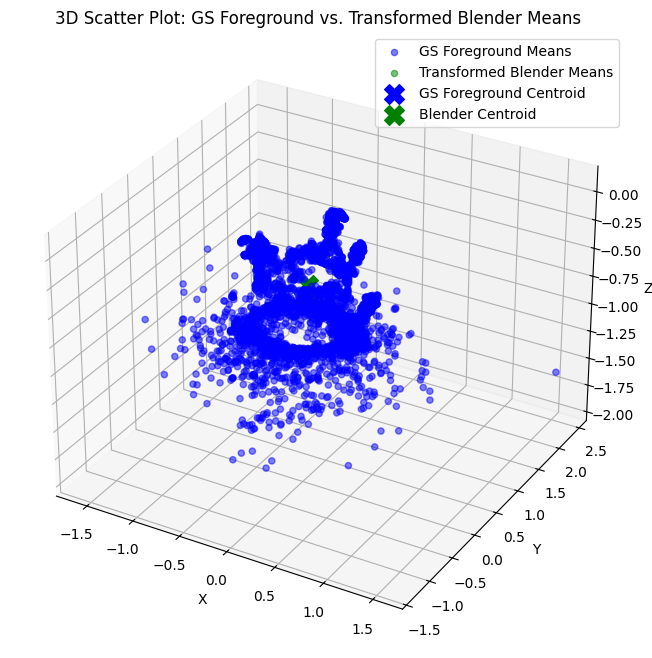

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)
invert = False  # Set to True if clusters appear switched
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold
# We use GS foreground means for alignment.
gs_foreground = model_means[foreground_mask]
foreground_centroid = gs_foreground.mean(axis=0)
print("Foreground centroid (GS):", foreground_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Procrustes Analysis
# -----------------------
def subsample_points(points, sample_size):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

# Use the same number of points from both sets (e.g., 5000)
N = min(gs_foreground.shape[0], blender_means.shape[0], 5000)
X = subsample_points(gs_foreground, sample_size=N)  # Target: GS foreground
Y = subsample_points(blender_means, sample_size=N)   # Source: Blender

def procrustes_analysis(X, Y):
    """
    Computes the optimal rigid transformation (rotation R, uniform scale s, translation t)
    that best maps Y to X.
    
    X: target points (N, 3)
    Y: source points (N, 3)
    
    Returns:
      R: rotation matrix (3,3)
      s: scale factor (float)
      t: translation vector (3,)
    """
    # Compute centroids.
    centroid_X = X.mean(axis=0)
    centroid_Y = Y.mean(axis=0)
    # Center the points.
    X0 = X - centroid_X
    Y0 = Y - centroid_Y
    # Compute covariance matrix.
    M = X0.T @ Y0
    U, S, Vt = np.linalg.svd(M)
    R = Vt.T @ U.T
    # Ensure proper rotation (determinant 1).
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = Vt.T @ U.T
    # Compute uniform scale.
    s = np.sum(S) / np.sum(Y0**2)
    t = centroid_X - s * R @ centroid_Y
    return R, s, t

R, s, t = procrustes_analysis(X, Y)
print("Optimal rotation matrix R:\n", R)
print("Optimal scale factor s:", s)
print("Optimal translation t:", t)

# Apply the transformation to all Blender points.
blender_transformed = (s * blender_means.dot(R.T)) + t
new_blender_centroid = blender_transformed.mean(axis=0)
print("New Blender centroid (after Procrustes):", new_blender_centroid)
print("Centroid difference (GS foreground - transformed Blender):", foreground_centroid - new_blender_centroid)

# -----------------------
# 5. Save the Transformed Blender Means and GS Background Means
# -----------------------
# Here we assume background_means (GS background) remains as is.
# For injection, you might want to use the transformed Blender means as the foreground.
# Optionally downsample the transformed Blender means to a target count.
# Let's downsample to the same count as GS background means for consistency.
background_count = model_means[~foreground_mask].shape[0]
if blender_transformed.shape[0] > background_count:
    indices = np.random.choice(blender_transformed.shape[0], background_count, replace=False)
    blender_transformed_subsample = blender_transformed[indices]
else:
    blender_transformed_subsample = blender_transformed

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=blender_transformed_subsample, background_means=model_means[~foreground_mask])
print(f"Saved transformed Blender means and background means to {save_path}")
print("Saved Blender Means count:", blender_transformed_subsample.shape[0])
print("Saved Background Means count:", model_means[~foreground_mask].shape[0])

# -----------------------
# 6. Visualization: GS Foreground vs. Transformed Blender Means
# -----------------------
def subsample_for_plot(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

foreground_sample = subsample_for_plot(gs_foreground)
blender_sample = subsample_for_plot(blender_transformed_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(foreground_sample[:, 0], foreground_sample[:, 1], foreground_sample[:, 2],
           c='blue', alpha=0.5, label='GS Foreground Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Transformed Blender Means')
ax.scatter(foreground_centroid[0], foreground_centroid[1], foreground_centroid[2],
           marker='X', s=200, c='blue', label='GS Foreground Centroid')
ax.scatter(new_blender_centroid[0], new_blender_centroid[1], new_blender_centroid[2],
           marker='X', s=200, c='green', label='Blender Centroid')
ax.set_title("3D Scatter Plot: GS Foreground vs. Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [3.20925073 1.79334742]
Determined threshold: 2.501299076594624
Total GS Gaussians: 268808
Background GS Gaussians: 155344
GS Foreground centroid: [ 0.03056665  0.10414194 -0.4841054 ]
GS Background centroid: [-0.00135069  0.09334132 -0.3459584 ]
Original Blender centroid: [-1.4853565  8.037843   6.323824 ]
GS weighted centroid: [ 0.03056664  0.10414202 -0.48410829]
Blender weighted centroid: [-1.46886841  7.38883731  6.5204952 ]
GS weighted RMS: 0.6560476988794391
Blender weighted RMS: 6.656061851494233
Density-based scale factor: 0.09856394269115178
New Blender weighted centroid (after transformation): [ 0.03056664  0.10414202 -0.48410829]
Centroid difference (GS weighted - transformed Blender weighted): [ 1.93768612e-14  2.34867681e-13 -7.86232746e-11]
Combined Means count: 310688
Saved combined means to C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz


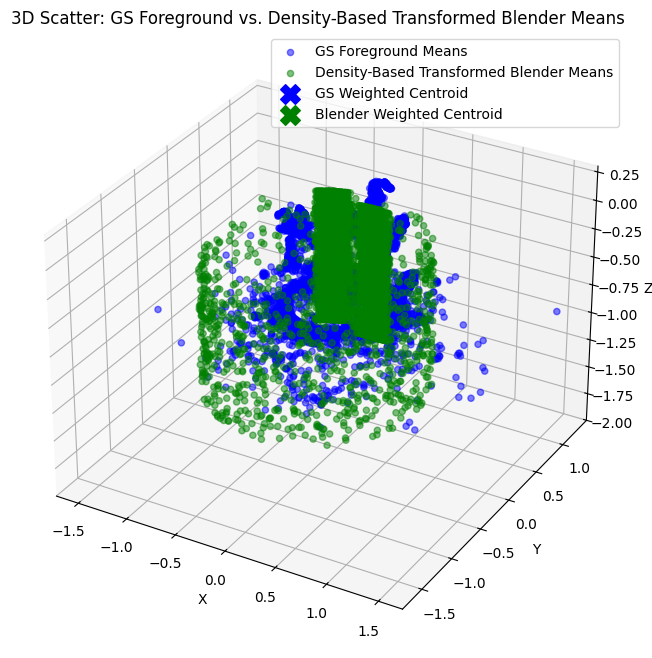

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)
invert = False  # Change to True if necessary.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

background_mask = ~foreground_mask
background_means = model_means[background_mask]
print("Total GS Gaussians:", model_means.shape[0])
print("Background GS Gaussians:", background_means.shape[0])

# Compute simple centroids for visualization.
foreground_centroid = model_means[foreground_mask].mean(axis=0)
background_centroid = background_means.mean(axis=0)
print("GS Foreground centroid:", foreground_centroid)
print("GS Background centroid:", background_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Density-Based Weighted Statistics with Subsampling
# -----------------------
def compute_local_density(points, radius=0.1, subsample_size=10000):
    """
    Compute an approximate density for each point.
    If points are more than subsample_size, we compute densities on a random subset
    and use the average as an approximation.
    """
    N = points.shape[0]
    if N > subsample_size:
        indices = np.random.choice(N, subsample_size, replace=False)
        subsampled = points[indices]
        tree = KDTree(subsampled)
        densities_sub = np.array([len(tree.query_ball_point(p, r=radius)) for p in subsampled])
        avg_density = np.mean(densities_sub)
        # Return an array with the average density for all points.
        return np.full(N, avg_density)
    else:
        tree = KDTree(points)
        all_neighbors = tree.query_ball_tree(tree, r=radius)
        densities = np.array([len(neighbors) for neighbors in all_neighbors])
        return densities

radius = 0.1  # Adjust based on scene scale.
gs_densities = compute_local_density(model_means[foreground_mask], radius=radius, subsample_size=10000)
blender_densities = compute_local_density(blender_means, radius=radius, subsample_size=10000)

# Compute density-weighted centroids.
gs_weighted_centroid = np.average(model_means[foreground_mask], axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid:", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

# Compute density-weighted RMS.
def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(model_means[foreground_mask], gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS:", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

# -----------------------
# 5. Density-Based Transformation
# -----------------------
density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Density-based scale factor:", density_scale_factor)

# Transform Blender means using density-weighted centroids.
blender_transformed = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0,
                                           weights=compute_local_density(blender_transformed, radius=radius, subsample_size=10000))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS weighted - transformed Blender weighted):", gs_weighted_centroid - new_blender_weighted_centroid)

# -----------------------
# 6. Downsample Blender Means to Match Background Count and Save to File
# -----------------------
target_count = background_means.shape[0]
if blender_transformed.shape[0] > target_count:
    indices = np.random.choice(blender_transformed.shape[0], target_count, replace=False)
    blender_transformed_subsample = blender_transformed[indices]
else:
    blender_transformed_subsample = blender_transformed

# Combine the transformed Blender means and the GS background means into one array.
combined_means = np.concatenate([blender_transformed_subsample, background_means], axis=0)
print("Combined Means count:", combined_means.shape[0])

# Save the combined means under the key "blender_means"
save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=combined_means)
print(f"Saved combined means to {save_path}")

# -----------------------
# 7. Visualization: GS Foreground vs. Density-Based Transformed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

foreground_sample = subsample_points(model_means[foreground_mask])
blender_sample = subsample_points(blender_transformed_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(foreground_sample[:, 0], foreground_sample[:, 1], foreground_sample[:, 2],
           c='blue', alpha=0.5, label='GS Foreground Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Density-Based Transformed Blender Means')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
ax.scatter(new_blender_weighted_centroid[0], new_blender_weighted_centroid[1], new_blender_weighted_centroid[2],
           marker='X', s=200, c='green', label='Blender Weighted Centroid')
ax.set_title("3D Scatter: GS Foreground vs. Density-Based Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [1.79334742 3.20925073]
Determined threshold: 2.501299076594624
Total GS Gaussians: 268808
GS (new target) Gaussians count: 155344
GS Target centroid (new): [-0.00135069  0.09334132 -0.3459584 ]
GS Other centroid (new): [ 0.03056665  0.10414194 -0.4841054 ]
Original Blender centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted centroid (target): [-0.0013507   0.09334049 -0.34595619]
Blender weighted centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted RMS (target): 0.5855796887047136
Blender weighted RMS: 8.082555932278245
Density-based scale factor: 0.0724498158269664
New Blender weighted centroid (after transformation): [-0.0013507   0.09334049 -0.34595619]
Centroid difference (GS weighted - transformed Blender weighted): [ 4.11996826e-17 -9.02056208e-16 -1.31850086e-11]
Combined Means count: 268808
Saved combined means to C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz


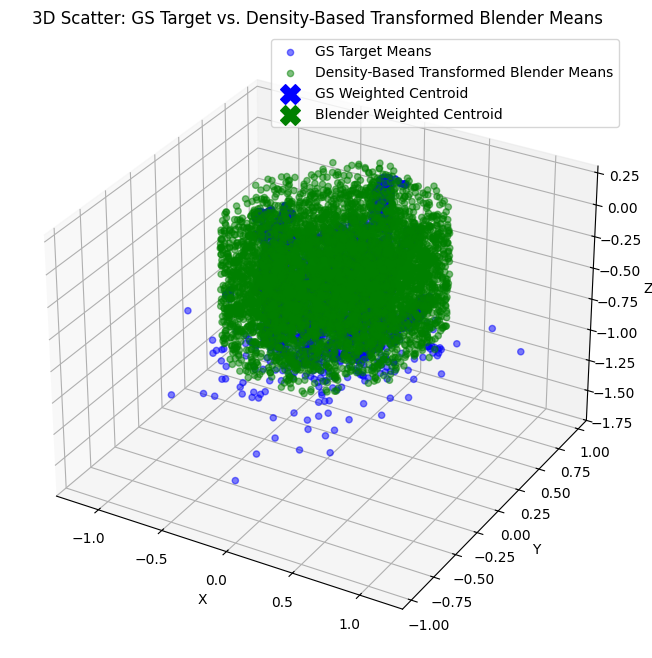

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
# Assume background is white.
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 2.0
print("Determined threshold:", threshold)
invert = False  # Change to True if necessary.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

# --- Switch: Treat what was previously "background" as the target.
# Originally, GS foreground = model_means[foreground_mask] and GS background = model_means[~foreground_mask].
# Now we switch them.
gs_target = model_means[~foreground_mask]  # This was previously background.
gs_other = model_means[foreground_mask]      # This was previously foreground.

print("Total GS Gaussians:", model_means.shape[0])
print("GS (new target) Gaussians count:", gs_target.shape[0])

# Compute simple centroids for visualization.
target_centroid = gs_target.mean(axis=0)
other_centroid = gs_other.mean(axis=0)
print("GS Target centroid (new):", target_centroid)
print("GS Other centroid (new):", other_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Density-Based Weighted Statistics with Subsampling (Using GS Target)
# -----------------------
def compute_local_density(points, radius=0.01, subsample_size=1000):
    """
    Compute an approximate density for each point.
    If points exceed subsample_size, compute densities on a random subset and use the average.
    """
    N = points.shape[0]
    if N > subsample_size:
        indices = np.random.choice(N, subsample_size, replace=False)
        subsampled = points[indices]
        tree = KDTree(subsampled)
        densities_sub = np.array([len(tree.query_ball_point(p, r=radius)) for p in subsampled])
        avg_density = np.mean(densities_sub)
        return np.full(N, avg_density)
    else:
        tree = KDTree(points)
        all_neighbors = tree.query_ball_tree(tree, r=radius)
        densities = np.array([len(neighbors) for neighbors in all_neighbors])
        return densities

radius = 0.1  # Adjust based on your scene scale.
# Now compute densities for the target (GS target) and Blender.
gs_densities = compute_local_density(gs_target, radius=radius, subsample_size=10000)
blender_densities = compute_local_density(blender_means, radius=radius, subsample_size=10000)

# Compute density-weighted centroids.
gs_weighted_centroid = np.average(gs_target, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid (target):", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

# Compute density-weighted RMS.
def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(gs_target, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS (target):", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

# -----------------------
# 5. Density-Based Transformation
# -----------------------
density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Density-based scale factor:", density_scale_factor)

# Transform Blender means using density-weighted centroids.
blender_transformed = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0,
                                           weights=compute_local_density(blender_transformed, radius=radius, subsample_size=10000))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS weighted - transformed Blender weighted):", gs_weighted_centroid - new_blender_weighted_centroid)

# -----------------------
# 6. Downsample Blender Means to Match Target Count and Save Combined
# -----------------------
target_count = gs_target.shape[0]
if blender_transformed.shape[0] > target_count:
    indices = np.random.choice(blender_transformed.shape[0], target_count, replace=False)
    blender_transformed_subsample = blender_transformed[indices]
else:
    blender_transformed_subsample = blender_transformed

# Now, combine the transformed Blender means (treated as foreground) with the GS "other" means (which were previously foreground)
# In our new scheme, we are injecting the target (GS background originally) and the "other" (GS foreground originally) together.
combined_means = np.concatenate([blender_transformed_subsample, gs_other], axis=0)
print("Combined Means count:", combined_means.shape[0])

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=combined_means)
print(f"Saved combined means to {save_path}")

# -----------------------
# 7. Visualization: GS Target vs. Density-Based Transformed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

# For visualization, we show the GS target (now our new "foreground" target) and the transformed Blender means.
target_sample = subsample_points(gs_target)
blender_sample = subsample_points(blender_transformed_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_sample[:, 0], target_sample[:, 1], target_sample[:, 2],
           c='blue', alpha=0.5, label='GS Target Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Density-Based Transformed Blender Means')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
ax.scatter(new_blender_weighted_centroid[0], new_blender_weighted_centroid[1], new_blender_weighted_centroid[2],
           marker='X', s=200, c='green', label='Blender Weighted Centroid')
ax.set_title("3D Scatter: GS Target vs. Density-Based Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [3.20921954 1.79332463]
Determined threshold: 2.265289601465115
Total GS Gaussians: 268808
GS (new target) Gaussians count (before outlier removal): 129185
GS Target centroid (new): [-0.00443242  0.08956059 -0.36005005]
GS Other centroid (new): [ 0.02743819  0.10561645 -0.44518286]
Outlier threshold (mean + 2*std): 0.93452215
GS Target count after outlier removal: 127751
Updated GS Target centroid (filtered): [-0.00298069  0.0907438  -0.35113788]
Original Blender centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted centroid (target): [-0.0029806   0.09074324 -0.3511395 ]
Blender weighted centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted RMS (target): 0.5747273093252026
Blender weighted RMS: 8.08255593227825
Density-based scale factor: 0.07110712429839043
New Blender weighted centroid (after transformation): [-0.0029806   0.09074324 -0.3511395 ]
Centroid difference (GS weighted - transformed Blender weighted): [-1.87

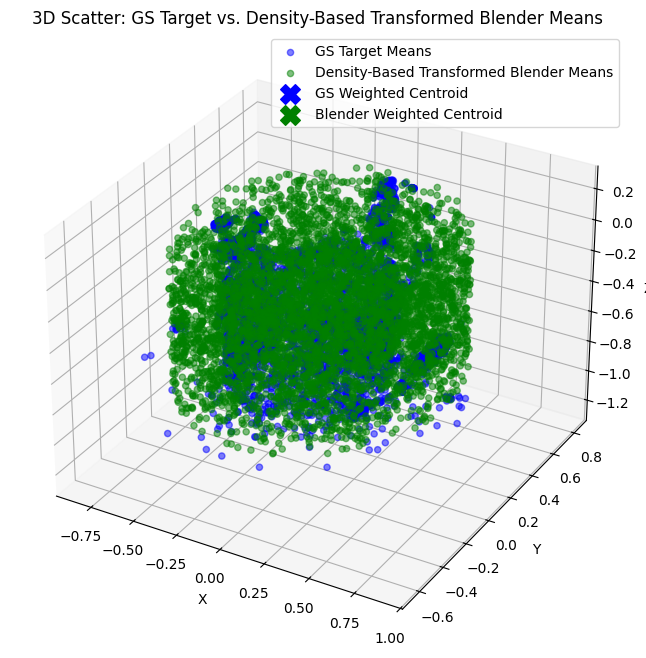

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
# Assume background is white.
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 3.0
print("Determined threshold:", threshold)
invert = False  # Change to True if necessary.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

# --- Switch: Treat what was previously "background" as the target.
# Originally, GS foreground = model_means[foreground_mask] and GS background = model_means[~foreground_mask].
# Now we switch them.
gs_target = model_means[~foreground_mask]  # This was previously background.
gs_other = model_means[foreground_mask]      # This was previously foreground.

print("Total GS Gaussians:", model_means.shape[0])
print("GS (new target) Gaussians count (before outlier removal):", gs_target.shape[0])

# Compute simple centroids for visualization.
target_centroid = gs_target.mean(axis=0)
other_centroid = gs_other.mean(axis=0)
print("GS Target centroid (new):", target_centroid)
print("GS Other centroid (new):", other_centroid)

# -----------------------
# 2b. Remove Outliers from GS Target Based on Distance from Centroid
# -----------------------
# Compute distances from each target point to the target centroid.
distances = np.linalg.norm(gs_target - target_centroid, axis=1)
mean_dist = np.mean(distances)
std_dist = np.std(distances)
threshold_dist = mean_dist + 2 * std_dist   # Adjust multiplier as needed.
print("Outlier threshold (mean + 2*std):", threshold_dist)
inlier_mask = distances <= threshold_dist
gs_target_filtered = gs_target[inlier_mask]
print("GS Target count after outlier removal:", gs_target_filtered.shape[0])
# Recompute weighted centroid on the filtered target.
target_centroid = gs_target_filtered.mean(axis=0)
print("Updated GS Target centroid (filtered):", target_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Density-Based Weighted Statistics with Subsampling (Using GS Target Filtered)
# -----------------------
def compute_local_density(points, radius=0.1, subsample_size=10000):
    """
    Compute an approximate density for each point.
    If points exceed subsample_size, compute densities on a random subset and use the average.
    """
    N = points.shape[0]
    if N > subsample_size:
        indices = np.random.choice(N, subsample_size, replace=False)
        subsampled = points[indices]
        tree = KDTree(subsampled)
        densities_sub = np.array([len(tree.query_ball_point(p, r=radius)) for p in subsampled])
        avg_density = np.mean(densities_sub)
        return np.full(N, avg_density)
    else:
        tree = KDTree(points)
        all_neighbors = tree.query_ball_tree(tree, r=radius)
        densities = np.array([len(neighbors) for neighbors in all_neighbors])
        return densities

radius = 0.1  # Adjust based on your scene scale.
# Compute densities for the filtered GS target and for Blender.
gs_densities = compute_local_density(gs_target_filtered, radius=radius, subsample_size=10000)
blender_densities = compute_local_density(blender_means, radius=radius, subsample_size=10000)

# Compute density-weighted centroids.
gs_weighted_centroid = np.average(gs_target_filtered, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid (target):", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

# Compute density-weighted RMS.
def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(gs_target_filtered, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS (target):", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

# -----------------------
# 5. Density-Based Transformation
# -----------------------
density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Density-based scale factor:", density_scale_factor)

# Transform Blender means using density-weighted centroids.
blender_transformed = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0,
                                           weights=compute_local_density(blender_transformed, radius=radius, subsample_size=10000))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS weighted - transformed Blender weighted):", gs_weighted_centroid - new_blender_weighted_centroid)

# -----------------------
# 6. Downsample Transformed Blender Means to Match Target Count and Save Combined
# -----------------------
target_count = gs_target_filtered.shape[0]
if blender_transformed.shape[0] > target_count:
    indices = np.random.choice(blender_transformed.shape[0], target_count, replace=False)
    blender_transformed_subsample = blender_transformed[indices]
else:
    blender_transformed_subsample = blender_transformed

# Now, combine the transformed Blender means (which are now aligned to the GS target) with the GS "other" means.
# This creates one combined array of injected means.
combined_means = np.concatenate([blender_transformed_subsample, gs_other], axis=0)
print("Combined Means count:", combined_means.shape[0])

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=combined_means)
print(f"Saved combined means to {save_path}")

# -----------------------
# 7. Visualization: GS Target vs. Density-Based Transformed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

target_sample = subsample_points(gs_target_filtered)
blender_sample = subsample_points(blender_transformed_subsample)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_sample[:, 0], target_sample[:, 1], target_sample[:, 2],
           c='blue', alpha=0.5, label='GS Target Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Density-Based Transformed Blender Means')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
ax.scatter(new_blender_weighted_centroid[0], new_blender_weighted_centroid[1], new_blender_weighted_centroid[2],
           marker='X', s=200, c='green', label='Blender Weighted Centroid')
ax.set_title("3D Scatter: GS Target vs. Density-Based Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


GS Target (Filtered) statistics:
  Min: [-0.83531964 -0.76775044 -1.2890811 ]
  25th percentile: [-0.3283111  -0.14496711 -0.45563573]
  Median: [ 0.0022979   0.06238208 -0.29978314]
  75th percentile: [ 0.32679218  0.35845262 -0.22611243]
  Max: [0.89371324 0.9290185  0.36634701]
  Range: [1.7290329 1.696769  1.6554282]

Density-Based Transformed Blender Means statistics:
  Min: [-0.71184461 -0.62029198 -0.77918991]
  25th percentile: [-0.29695985 -0.20538188 -0.56586854]
  Median: [-0.00273553  0.09093129 -0.35254717]
  75th percentile: [ 0.29174213  0.38544265 -0.13922579]
  Max: [0.70754598 0.80134199 0.10964914]
  Range: [1.41939059 1.42163397 0.88883905]



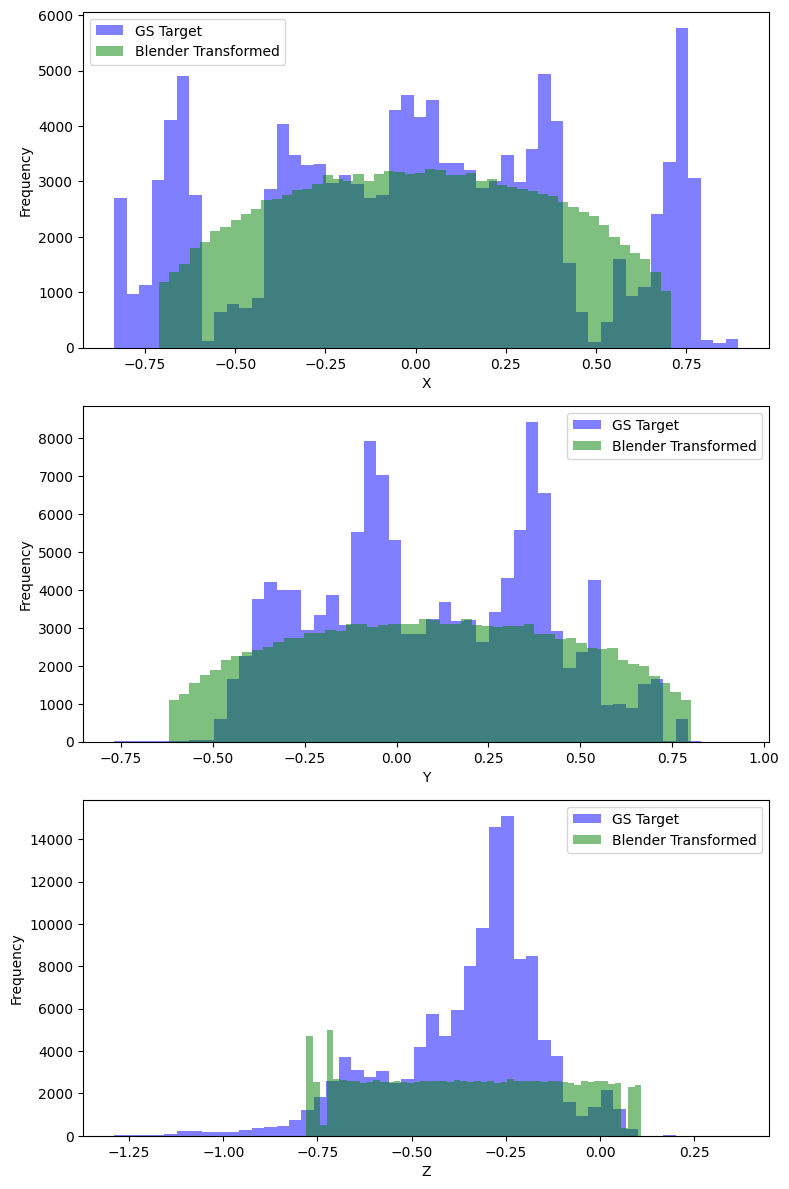

In [16]:
def print_spread_stats(points, label):
    mins = points.min(axis=0)
    q25 = np.percentile(points, 25, axis=0)
    medians = np.median(points, axis=0)
    q75 = np.percentile(points, 75, axis=0)
    maxs = points.max(axis=0)
    ranges = maxs - mins
    print(f"{label} statistics:")
    print("  Min:", mins)
    print("  25th percentile:", q25)
    print("  Median:", medians)
    print("  75th percentile:", q75)
    print("  Max:", maxs)
    print("  Range:", ranges)
    print()

# Compute spread statistics for GS target (filtered) and transformed Blender means.
print_spread_stats(gs_target_filtered, "GS Target (Filtered)")
print_spread_stats(blender_transformed_subsample, "Density-Based Transformed Blender Means")

# Optionally, plot histograms for each axis.
axes_labels = ['X', 'Y', 'Z']
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
for i in range(3):
    axs[i].hist(gs_target_filtered[:, i], bins=50, alpha=0.5, label='GS Target', color='blue')
    axs[i].hist(blender_transformed_subsample[:, i], bins=50, alpha=0.5, label='Blender Transformed', color='green')
    axs[i].set_xlabel(axes_labels[i])
    axs[i].set_ylabel("Frequency")
    axs[i].legend()
plt.tight_layout()
plt.show()


Cluster centers (color difference): [1.79332463 3.20921954]
Determined threshold: 2.265289601465115
Total GS Gaussians: 268808
GS (new target) Gaussians count (before outlier removal): 129185
GS Target centroid (new): [-0.00443242  0.08956059 -0.36005005]
GS Target count after outlier removal: 127533
Updated GS Target centroid (filtered): [-0.00232419  0.09041452 -0.35219166]
Original Blender centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted centroid (target): [-0.00232406  0.09041394 -0.3521931 ]
Blender weighted centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted RMS (target): 0.5767653648132773
Blender weighted RMS: 8.0825559322782
Density-based scale factor: 0.07135927912480361
New Blender weighted centroid (after transformation): [-0.00232406  0.09041394 -0.3521931 ]
Centroid difference (GS weighted - transformed Blender weighted): [-2.90566182e-17  3.94129174e-15  8.67861338e-13]
Target XY Centroid: [-0.00232419  0.09041452]
Target cylinder rad

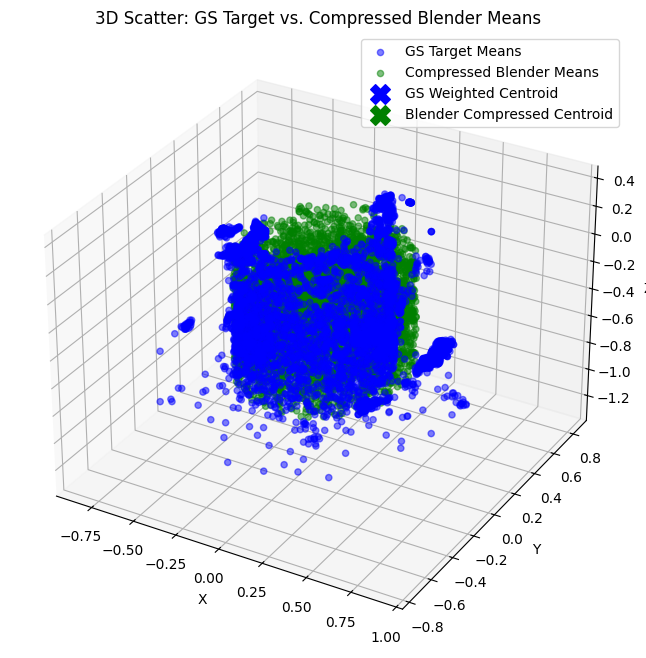

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 3.0
print("Determined threshold:", threshold)
invert = False  # Change to True if necessary.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

# Switch: Previously GS foreground = model_means[foreground_mask] and GS background = model_means[~foreground_mask].
# Now, we treat what was previously background as our target.
gs_target = model_means[~foreground_mask]  # New target set.
gs_other  = model_means[foreground_mask]      # Other set.
print("Total GS Gaussians:", model_means.shape[0])
print("GS (new target) Gaussians count (before outlier removal):", gs_target.shape[0])

# Compute simple centroid for GS target.
target_centroid = gs_target.mean(axis=0)
print("GS Target centroid (new):", target_centroid)

# -----------------------
# 2b. Remove Outliers from GS Target Based on Gaussian Weights
# -----------------------
distances = np.linalg.norm(gs_target - target_centroid, axis=1)
mean_dist = np.mean(distances)
std_dist = np.std(distances)
# Normalize distances and compute Gaussian weights.
d_norm = (distances - mean_dist) / std_dist
weights = np.exp(-0.5 * d_norm**2)
weight_threshold = 0.1  # Adjust threshold as needed.
inlier_mask = weights >= weight_threshold
gs_target_filtered = gs_target[inlier_mask]
print("GS Target count after outlier removal:", gs_target_filtered.shape[0])
target_centroid = gs_target_filtered.mean(axis=0)
print("Updated GS Target centroid (filtered):", target_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Density-Based Weighted Transformation (Global)
# -----------------------
def compute_local_density(points, radius=0.1, subsample_size=10000):
    """
    Compute an approximate density for each point.
    If points exceed subsample_size, compute densities on a random subset and use the average.
    """
    N = points.shape[0]
    if N > subsample_size:
        indices = np.random.choice(N, subsample_size, replace=False)
        subsampled = points[indices]
        tree = KDTree(subsampled)
        densities_sub = np.array([len(tree.query_ball_point(p, r=radius)) for p in subsampled])
        avg_density = np.mean(densities_sub)
        return np.full(N, avg_density)
    else:
        tree = KDTree(points)
        all_neighbors = tree.query_ball_tree(tree, r=radius)
        densities = np.array([len(neighbors) for neighbors in all_neighbors])
        return densities

radius = 0.1  # Adjust based on your scene scale.
gs_densities = compute_local_density(gs_target_filtered, radius=radius, subsample_size=10000)
blender_densities = compute_local_density(blender_means, radius=radius, subsample_size=10000)

gs_weighted_centroid = np.average(gs_target_filtered, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid (target):", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(gs_target_filtered, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS (target):", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Density-based scale factor:", density_scale_factor)

# Global density-based transformation of Blender means.
blender_transformed = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0,
    weights=compute_local_density(blender_transformed, radius=radius, subsample_size=10000))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS weighted - transformed Blender weighted):", gs_weighted_centroid - new_blender_weighted_centroid)

# -----------------------
# 5b. Compress Blender Points in XY so that they lie within the target cylinder
# -----------------------
# Compute GS target XY centroid and target radius (using median XY distance).
gs_xy = gs_target_filtered[:, :2]
target_xy_centroid = np.mean(gs_xy, axis=0)
target_radius = np.median(np.linalg.norm(gs_xy - target_xy_centroid, axis=1))
print("Target XY Centroid:", target_xy_centroid)
print("Target cylinder radius (median):", target_radius)

# Compute Blender transformed XY centroid and current maximum radial distance.
blender_xy = blender_transformed[:, :2]
blender_xy_centroid = np.mean(blender_xy, axis=0)
current_max_radial = np.max(np.linalg.norm(blender_xy - blender_xy_centroid, axis=1))
print("Current max radial distance (Blender):", current_max_radial)

# Compute a uniform scaling factor so that the max radial distance becomes the target radius.
uniform_scale = target_radius / current_max_radial
print("Uniform scaling factor (XY):", uniform_scale)

# Apply scaling: compress the XY coordinates relative to the Blender XY centroid.
blender_xy_compressed = blender_xy_centroid + uniform_scale * (blender_xy - blender_xy_centroid)
blender_compressed = blender_transformed.copy()
blender_compressed[:, :2] = blender_xy_compressed

new_max_radial = np.max(np.linalg.norm(blender_compressed[:, :2] - blender_xy_centroid, axis=1))
print("New max radial distance (Blender compressed):", new_max_radial)

# -----------------------
# 6. Downsample Blender Compressed Points to Match Target Count and Save Combined
# -----------------------
target_count = gs_target_filtered.shape[0]
if blender_compressed.shape[0] > target_count:
    indices = np.random.choice(blender_compressed.shape[0], target_count, replace=False)
    blender_compressed_subsample = blender_compressed[indices]
else:
    blender_compressed_subsample = blender_compressed

# Combine the compressed Blender points with the GS "other" means.
combined_means = np.concatenate([blender_compressed_subsample, gs_other], axis=0)
print("Combined Means count:", combined_means.shape[0])

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=combined_means)
print(f"Saved combined means to {save_path}")

# -----------------------
# 7. Visualization: Compare GS Target vs. Compressed Blender Points
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

target_sample = subsample_points(gs_target_filtered)
blender_sample = subsample_points(blender_compressed_subsample)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_sample[:, 0], target_sample[:, 1], target_sample[:, 2],
           c='blue', alpha=0.5, label='GS Target Means')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Compressed Blender Means')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
blender_centroid_compressed = np.average(blender_compressed_subsample, axis=0)
ax.scatter(blender_centroid_compressed[0], blender_centroid_compressed[1], blender_centroid_compressed[2],
           marker='X', s=200, c='green', label='Blender Compressed Centroid')
ax.set_title("3D Scatter: GS Target vs. Compressed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # shape: (N_model, 3)
model_colors = data['colors']  # shape: (N_model, 3); assumed normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
# Use a threshold (here, a third of the range) to separate
threshold = centers.min() + (centers.max() - centers.min()) / 3.0
print("Determined threshold:", threshold)
invert = False  # Change to True if needed.
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

# Switch: Now treat what was previously background as the target.
gs_target = model_means[~foreground_mask]  # New target set.
print("Total GS Gaussians:", model_means.shape[0])
print("GS (new target) Gaussians count (before outlier removal):", gs_target.shape[0])

# Compute a simple centroid for the GS target.
target_centroid = gs_target.mean(axis=0)
print("GS Target centroid (new):", target_centroid)

# -----------------------
# 2b. Remove Outliers from GS Target Based on Gaussian Weights
# -----------------------
distances = np.linalg.norm(gs_target - target_centroid, axis=1)
mean_dist = np.mean(distances)
std_dist = np.std(distances)
# Compute Gaussian weights on normalized distances.
d_norm = (distances - mean_dist) / std_dist
weights = np.exp(-0.5 * d_norm**2)
weight_threshold = 0.1  # Adjust as needed.
inlier_mask = weights >= weight_threshold
gs_target_filtered = gs_target[inlier_mask]
print("GS Target count after outlier removal:", gs_target_filtered.shape[0])
target_centroid = gs_target_filtered.mean(axis=0)
print("Updated GS Target centroid (filtered):", target_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Density-Based Weighted Global Transformation
# -----------------------
def compute_local_density(points, radius=0.1, subsample_size=10000):
    """
    Compute an approximate density for each point.
    If points exceed subsample_size, compute densities on a random subset and return the average.
    """
    N = points.shape[0]
    if N > subsample_size:
        indices = np.random.choice(N, subsample_size, replace=False)
        subsampled = points[indices]
        tree = KDTree(subsampled)
        densities_sub = np.array([len(tree.query_ball_point(p, r=radius)) for p in subsampled])
        avg_density = np.mean(densities_sub)
        return np.full(N, avg_density)
    else:
        tree = KDTree(points)
        all_neighbors = tree.query_ball_tree(tree, r=radius)
        densities = np.array([len(neighbors) for neighbors in all_neighbors])
        return densities

radius = 0.1  # Adjust based on scene scale.
gs_densities = compute_local_density(gs_target_filtered, radius=radius, subsample_size=10000)
blender_densities = compute_local_density(blender_means, radius=radius, subsample_size=10000)

gs_weighted_centroid = np.average(gs_target_filtered, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid (target):", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(gs_target_filtered, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS (target):", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Density-based scale factor:", density_scale_factor)

# Apply the global transformation to Blender means.
blender_transformed = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
new_blender_weighted_centroid = np.average(blender_transformed, axis=0,
    weights=compute_local_density(blender_transformed, radius=radius, subsample_size=10000))
print("New Blender weighted centroid (after transformation):", new_blender_weighted_centroid)
print("Centroid difference (GS weighted - transformed Blender weighted):", gs_weighted_centroid - new_blender_weighted_centroid)

# -----------------------
# 5b. Compress Blender Points in XY to Fit Within the Target Cylinder
# -----------------------
# Estimate the target XY centroid and target radius from the filtered GS target.
gs_xy = gs_target_filtered[:, :2]
target_xy_centroid = np.mean(gs_xy, axis=0)
target_radius = np.median(np.linalg.norm(gs_xy - target_xy_centroid, axis=1))
print("Target XY Centroid:", target_xy_centroid)
print("Target cylinder radius (median):", target_radius)

# Compute Blender transformed XY centroid and current maximum radial distance.
blender_xy = blender_transformed[:, :2]
blender_xy_centroid = np.mean(blender_xy, axis=0)
current_max_radial = np.max(np.linalg.norm(blender_xy - blender_xy_centroid, axis=1))
print("Current max radial distance (Blender):", current_max_radial)

# Compute a uniform scaling factor so that the maximum radial distance becomes the target radius.
uniform_scale = target_radius / current_max_radial
print("Uniform scaling factor (XY):", uniform_scale)

# Apply scaling to the Blender XY coordinates relative to the Blender XY centroid.
blender_xy_compressed = blender_xy_centroid + uniform_scale * (blender_xy - blender_xy_centroid)
blender_compressed = blender_transformed.copy()
blender_compressed[:, :2] = blender_xy_compressed

new_max_radial = np.max(np.linalg.norm(blender_compressed[:, :2] - blender_xy_centroid, axis=1))
print("New max radial distance (Blender compressed):", new_max_radial)

# -----------------------
# 6. Downsample Blender Compressed Points to Match Target Count and Save
# -----------------------
# Here, we only want the Blender points (no GS "other" means) to be injected.
target_count = gs_target_filtered.shape[0]
if blender_compressed.shape[0] > target_count:
    indices = np.random.choice(blender_compressed.shape[0], target_count, replace=False)
    blender_compressed_subsample = blender_compressed[indices]
else:
    blender_compressed_subsample = blender_compressed

print("Final Blender points count:", blender_compressed_subsample.shape[0])

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_only_means.npz"
# Save only the transformed (and compressed) Blender means under key "blender_means"
np.savez(save_path, blender_means=blender_compressed_subsample)
print(f"Saved transformed Blender means to {save_path}")

# -----------------------
# 7. Visualization: Compare GS Target (Filtered) and Compressed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

target_sample = subsample_points(gs_target_filtered)
blender_sample = subsample_points(blender_compressed_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_sample[:, 0], target_sample[:, 1], target_sample[:, 2],
           c='blue', alpha=0.5, label='GS Target Means (Filtered)')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Compressed Blender Means')
ax.scatter(gs_weighted_centroid[0], gs_weighted_centroid[1], gs_weighted_centroid[2],
           marker='X', s=200, c='blue', label='GS Weighted Centroid')
blender_centroid_compressed = np.average(blender_compressed_subsample, axis=0)
ax.scatter(blender_centroid_compressed[0], blender_centroid_compressed[1], blender_centroid_compressed[2],
           marker='X', s=200, c='green', label='Blender Compressed Centroid')
ax.set_title("3D Scatter: GS Target vs. Compressed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


Cluster centers (color difference): [1.79334742 3.20925073]
Determined threshold: 2.2653151920331873
Total GS Gaussians: 268808
GS (new target) Gaussians count (before outlier removal): 129192
GS Target centroid (new): [-0.00443324  0.08955978 -0.36005396]
Outlier threshold (mean + 2*std): 0.93453324
GS Target count after outlier removal: 127758
Updated GS Target centroid (filtered): [-0.00298021  0.09074211 -0.3511432 ]
Original Blender centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted centroid (target): [-0.00298012  0.09074153 -0.35114486]
Blender weighted centroid: [1.74283878e-03 4.61284611e-03 6.51979640e+00]
GS weighted RMS (target): 0.5747317389773859
Blender weighted RMS: 8.082555932278245
Global density-based scale factor: 0.07110767234930662
GS cluster centers:
 [[ 0.07259047  0.1938877  -0.660846  ]
 [-0.6262361   0.3564884  -0.27584192]
 [-0.17700776 -0.21882823 -0.41071615]
 [ 0.5327981  -0.11124249 -0.3304797 ]
 [ 0.03156503  0.44880655 -0.1560142 ]]
N

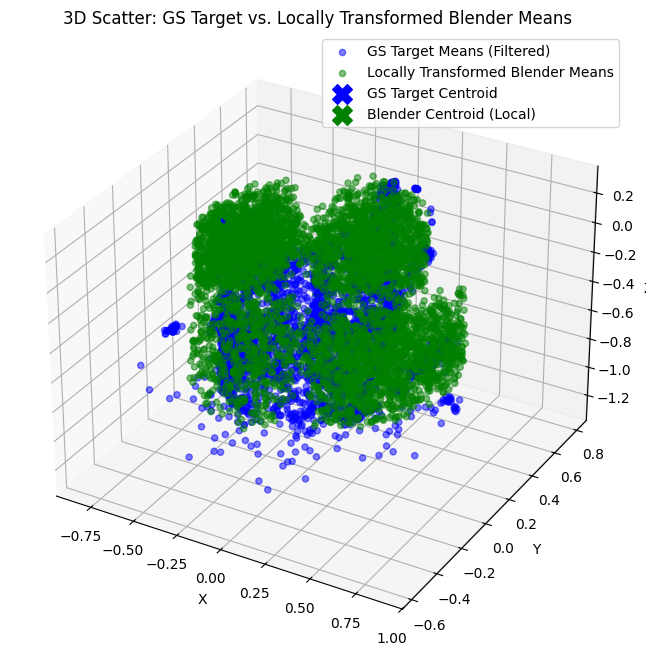

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.cluster.vq import kmeans
from scipy.spatial import KDTree
from sklearn.cluster import KMeans  # For local clustering

# -----------------------
# 1. Load GSplat Data (Means and Colors)
# -----------------------
data = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/model_means_color.npz")
model_means = data['means']    # (N_model, 3)
model_colors = data['colors']  # (N_model, 3), normalized in [0,1]

# -----------------------
# 2. Separate Foreground vs. Background Based on Color
# -----------------------
background_color = np.array([1.0, 1.0, 1.0])
color_diff = np.linalg.norm(model_colors - background_color, axis=1).reshape(-1, 1)
centers, _ = kmeans(color_diff, 2)
centers = centers.flatten()
print("Cluster centers (color difference):", centers)
threshold = centers.min() + (centers.max() - centers.min()) / 3.0
print("Determined threshold:", threshold)
invert = False
if invert:
    foreground_mask = color_diff.flatten() <= threshold
else:
    foreground_mask = color_diff.flatten() > threshold

# Switch: Treat what was previously "background" as the target.
# Originally, GS foreground = model_means[foreground_mask] and GS background = model_means[~foreground_mask].
gs_target = model_means[~foreground_mask]  # Previously background.
gs_other  = model_means[foreground_mask]     # Previously foreground.
print("Total GS Gaussians:", model_means.shape[0])
print("GS (new target) Gaussians count (before outlier removal):", gs_target.shape[0])

# Compute simple centroid for target.
target_centroid = gs_target.mean(axis=0)
print("GS Target centroid (new):", target_centroid)

# -----------------------
# 2b. Remove Outliers from GS Target Based on Distance from Centroid
# -----------------------
distances = np.linalg.norm(gs_target - target_centroid, axis=1)
mean_dist = np.mean(distances)
std_dist = np.std(distances)
threshold_dist = mean_dist + 2 * std_dist   # Adjust multiplier as needed.
print("Outlier threshold (mean + 2*std):", threshold_dist)
inlier_mask = distances <= threshold_dist
gs_target_filtered = gs_target[inlier_mask]
print("GS Target count after outlier removal:", gs_target_filtered.shape[0])
target_centroid = gs_target_filtered.mean(axis=0)
print("Updated GS Target centroid (filtered):", target_centroid)

# -----------------------
# 3. Load Blender Means (sampled from the object surface)
# -----------------------
blender_means = np.load("C:/Users/abhilash.durgam/Documents/ascc_parts/blender_means.npy")
blender_centroid = blender_means.mean(axis=0)
print("Original Blender centroid:", blender_centroid)

# -----------------------
# 4. Density-Based Weighted Transformation (Global)
# -----------------------
def compute_local_density(points, radius=0.1, subsample_size=10000):
    """
    Compute an approximate density for each point.
    If points exceed subsample_size, compute densities on a random subset and use the average.
    """
    N = points.shape[0]
    if N > subsample_size:
        indices = np.random.choice(N, subsample_size, replace=False)
        subsampled = points[indices]
        tree = KDTree(subsampled)
        densities_sub = np.array([len(tree.query_ball_point(p, r=radius)) for p in subsampled])
        avg_density = np.mean(densities_sub)
        return np.full(N, avg_density)
    else:
        tree = KDTree(points)
        all_neighbors = tree.query_ball_tree(tree, r=radius)
        densities = np.array([len(neighbors) for neighbors in all_neighbors])
        return densities

radius = 0.1  # Adjust based on scene scale.
gs_densities = compute_local_density(gs_target_filtered, radius=radius, subsample_size=10000)
blender_densities = compute_local_density(blender_means, radius=radius, subsample_size=10000)

gs_weighted_centroid = np.average(gs_target_filtered, axis=0, weights=gs_densities)
blender_weighted_centroid = np.average(blender_means, axis=0, weights=blender_densities)
print("GS weighted centroid (target):", gs_weighted_centroid)
print("Blender weighted centroid:", blender_weighted_centroid)

def compute_weighted_rms(points, centroid, weights):
    diff = points - centroid
    weighted_sq = weights * np.sum(diff**2, axis=1)
    return np.sqrt(np.sum(weighted_sq) / np.sum(weights))

gs_weighted_rms = compute_weighted_rms(gs_target_filtered, gs_weighted_centroid, gs_densities)
blender_weighted_rms = compute_weighted_rms(blender_means, blender_weighted_centroid, blender_densities)
print("GS weighted RMS (target):", gs_weighted_rms)
print("Blender weighted RMS:", blender_weighted_rms)

density_scale_factor = gs_weighted_rms / blender_weighted_rms
print("Global density-based scale factor:", density_scale_factor)

# Global transformation (for reference)
blender_transformed_global = gs_weighted_centroid + density_scale_factor * (blender_means - blender_weighted_centroid)
# (We won't use the global one for final injection.)

# -----------------------
# 5. Local-Based Scaling via Clustering
# -----------------------
# Cluster the filtered GS target into K clusters.
K = 5  # Choose the number of local clusters
kmeans_obj = KMeans(n_clusters=K, random_state=42).fit(gs_target_filtered)
gs_cluster_centers = kmeans_obj.cluster_centers_
gs_cluster_labels = kmeans_obj.labels_
print("GS cluster centers:\n", gs_cluster_centers)

# Assign each Blender point to the nearest GS cluster center.
# (We use Euclidean distance for assignment.)
distances_to_centers = np.linalg.norm(blender_means[:, None, :] - gs_cluster_centers[None, :, :], axis=2)
blender_cluster_labels = np.argmin(distances_to_centers, axis=1)

# Now, for each cluster, compute a local transformation.
blender_transformed_local = np.zeros_like(blender_means)
for k in range(K):
    # Get local GS points in cluster k.
    gs_cluster = gs_target_filtered[gs_cluster_labels == k]
    if gs_cluster.shape[0] == 0:
        continue
    gs_cluster_centroid = gs_cluster.mean(axis=0)
    gs_cluster_rms = np.sqrt(np.mean(np.sum((gs_cluster - gs_cluster_centroid)**2, axis=1)))
    
    # Get Blender points assigned to cluster k.
    blender_cluster = blender_means[blender_cluster_labels == k]
    if blender_cluster.shape[0] == 0:
        continue
    blender_cluster_centroid = blender_cluster.mean(axis=0)
    blender_cluster_rms = np.sqrt(np.mean(np.sum((blender_cluster - blender_cluster_centroid)**2, axis=1)))
    
    # Local scale factor.
    local_scale = gs_cluster_rms / blender_cluster_rms
    # Apply local transformation.
    transformed = gs_cluster_centroid + local_scale * (blender_cluster - blender_cluster_centroid)
    # Place transformed points back.
    blender_transformed_local[blender_cluster_labels == k] = transformed

# Compute new weighted centroid of locally transformed Blender points.
new_blender_weighted_centroid_local = np.average(blender_transformed_local, axis=0,
    weights=compute_local_density(blender_transformed_local, radius=radius, subsample_size=10000))
print("New Blender weighted centroid (local):", new_blender_weighted_centroid_local)

# -----------------------
# 6. Downsample Locally Transformed Blender Means to Match Target Count and Save Combined
# -----------------------
target_count = gs_target_filtered.shape[0]
if blender_transformed_local.shape[0] > target_count:
    indices = np.random.choice(blender_transformed_local.shape[0], target_count, replace=False)
    blender_transformed_local_subsample = blender_transformed_local[indices]
else:
    blender_transformed_local_subsample = blender_transformed_local

# Combine the locally transformed Blender means with the GS "other" means.
combined_means = np.concatenate([blender_transformed_local_subsample, gs_other], axis=0)
print("Combined Means count:", combined_means.shape[0])

save_path = "C:/Users/abhilash.durgam/Documents/ascc_parts/blender_and_background_means.npz"
np.savez(save_path, blender_means=combined_means)
print(f"Saved combined means to {save_path}")

# -----------------------
# 7. Visualization: Compare GS Target (Filtered) and Locally Transformed Blender Means
# -----------------------
def subsample_points(points, sample_size=5000):
    if points.shape[0] > sample_size:
        indices = np.random.choice(points.shape[0], sample_size, replace=False)
        return points[indices, :]
    return points

target_sample = subsample_points(gs_target_filtered)
blender_sample = subsample_points(blender_transformed_local_subsample)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_sample[:, 0], target_sample[:, 1], target_sample[:, 2],
           c='blue', alpha=0.5, label='GS Target Means (Filtered)')
ax.scatter(blender_sample[:, 0], blender_sample[:, 1], blender_sample[:, 2],
           c='green', alpha=0.5, label='Locally Transformed Blender Means')
ax.scatter(gs_target_filtered.mean(axis=0)[0], gs_target_filtered.mean(axis=0)[1], gs_target_filtered.mean(axis=0)[2],
           marker='X', s=200, c='blue', label='GS Target Centroid')
ax.scatter(new_blender_weighted_centroid_local[0], new_blender_weighted_centroid_local[1],
           new_blender_weighted_centroid_local[2], marker='X', s=200, c='green', label='Blender Centroid (Local)')
ax.set_title("3D Scatter: GS Target vs. Locally Transformed Blender Means")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.legend()
plt.show()


In [ ]:
import open3d as o3d
import numpy as np

# Load the point cloud from the PLY file.
pcd = o3d.io.read_point_cloud("D:/ASCC_parts_extended/workspace/undist_vth/output.ply")

# Convert colors to a NumPy array. (Colors are typically normalized to [0, 1].)
colors = np.asarray(pcd.colors)

# Create a boolean mask: True for points that are not black.
mask = np.any(colors > 0, axis=1)

# Filter points and corresponding colors.
filtered_points = np.asarray(pcd.points)[mask]
filtered_colors = colors[mask]

# Create a new point cloud with the filtered data.
filtered_pcd = o3d.geometry.PointCloud()
filtered_pcd.points = o3d.utility.Vector3dVector(filtered_points)
filtered_pcd.colors = o3d.utility.Vector3dVector(filtered_colors)

# Save the filtered point cloud to a new PLY file.
o3d.io.write_point_cloud("D:/ASCC_parts_extended/workspace/undist_vth/output_filtered.ply", filtered_pcd)
